<a href="https://colab.research.google.com/github/RobertSichomba/homework_2/blob/main/HW2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install numpy pandas matplotlib seaborn scikit-learn


## This Is Problem 1

## Data Loading and Initial Exploration  

To begin this analysis, the **`Nutrition_data.csv`** dataset was loaded from my Google Drive. Since am using Google Colab, storing the dataset in my Drive ensures easy access, better organization, and improved reference for future analysis and revisions.  

After loading the dataset, an initial exploration will conducted to understand its structure and key attributes. This step provides a foundational understanding of the dataset we are dealing with, including the number of observations, variables, and their respective data types.  


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import os
from sklearn.cluster import KMeans
from google.colab import drive

file_path = "/content/drive/My Drive/Nutrition_data.csv"

def data(file_path: str) -> pd.DataFrame:
    """Here I Load and display basic information of the given dataset."""
    try:
        df = pd.read_csv(file_path)
        print(f"Rows: {df.shape[0]}, Columns: {df.shape[1]}")
        print("\nFirst 5 rows:")
        print(df.head())
        return df
    except Exception as e:
        print(f"Error: {e}")
        return None

# Here we Load the dataset
nutrition_data = data(file_path)


Rows: 25, Columns: 11

First 5 rows:
   Red Meat  White meat  Eggs   Milk  Fish  Cereal  Starch  Nuts  \
0      10.1         1.4    0.5   8.9   0.2    42.3     0.6   5.5   
1       8.9        14.0    4.3  19.9   2.1    28.0     3.6   1.3   
2      13.5         9.3    4.1  17.5   4.5    26.6     5.7   2.1   
3       7.8         6.0    1.6   8.3   1.2    56.7     1.1   3.7   
4       9.7        11.4    2.8  12.5   2.0    34.3     5.0   1.1   

   Fruits and Vegatbles         Country                 Group  
0                   1.7         Albania         Mediterranean  
1                   4.3         Austria  North-Western-Europe  
2                   4.0         Belgium  North-Western-Europe  
3                   4.2        Bulgaria        Eastern-Europe  
4                   4.0  Czechoslovakia        Eastern-Europe  


## Part (a) Exploratory Data Analysis (EDA)  
### Here we look at the Summary Statistics of the Dataset
Here we compute the **mean** and **standard deviation** for each numerical feature.  

- **Mean** provides insight into the central tendency of each variable, representing the average value.  
- **Standard Deviation** measures the dispersion of data points from the mean, indicating variability in consumption patterns.  


In [ ]:
#This is the Summary Statistics (Mean & Standard Deviation) respectively.

summary_stats = nutrition_data.describe().T[['mean', 'std']]
print("\nSummary Statistics (Mean & Std Dev):")
print(summary_stats)


Summary Statistics (Mean & Std Dev):
                        mean        std
Red Meat               9.828   3.347078
White meat             7.896   3.694081
Eggs                   2.936   1.117617
Milk                  17.112   7.105416
Fish                   4.284   3.402533
Cereal                32.248  10.974786
Starch                 4.276   1.634085
Nuts                   3.072   1.985682
Fruits and Vegatbles   4.136   1.803903



### **Summary Statistics (Mean & Standard Deviation)**  

To better understand the dataset and its characteristics, we first performed a standard exploratory statistical analysis by calculating the **mean** and **standard deviation** for each feature. This summary statistics help in understanding the central tendency and the variability in the Nutrition_data.csv dataset; food consumption data across different countries.


- The consumption of **milk** and **cereal** shows significant variability, which could be due to cultural preferences, production scale, or even regional dietary habits, especially given the geographic diversity in the Nutrition_data.csv dataset.
- On the other hand, foods like **eggs** and **fruits & vegetables** demonstrate more consistency in consumption across countries, possibly suggesting more uniform dietary habits.
- The **mean** values indicate that **cereal** consumption is the highest, while **eggs** and **fish** are consumed less.

This summary statistics provide an initial overview of the food consumption patterns across different European countries in the 1980s. The next step in the analysis would be to explore the correlations between these food categories, this is to identify any notable relationships or patterns that could provide further insights into the dietary habits of these countries.




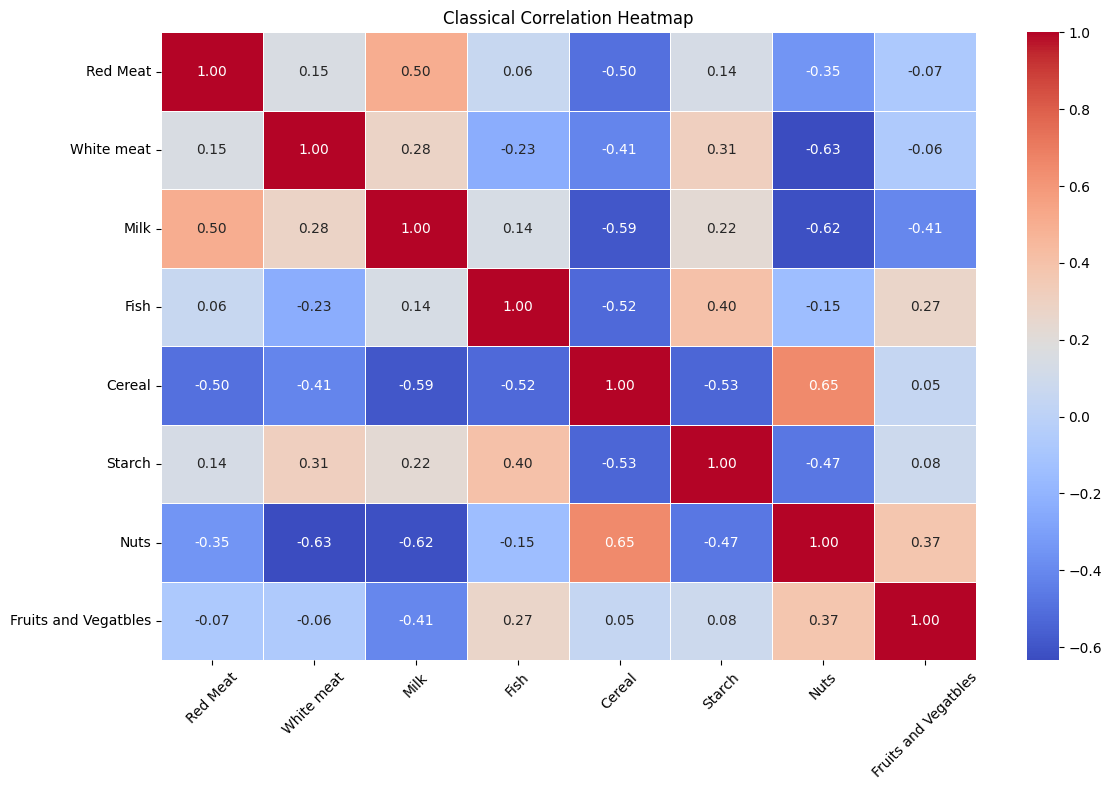

In [ ]:
numerical_cols = ['Red Meat', 'White meat', 'Eggs', 'Milk', 'Fish',
                 'Cereal', 'Starch', 'Nuts', 'Fruits and Vegatbles']

numerical_cols = [col for col in numerical_cols if col in nutrition_data.columns]

corr_matrix = nutrition_data[numerical_cols].corr()

plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix,
           annot=True,
           cmap='coolwarm',
           fmt=".2f",
           linewidths=0.5)
plt.title("Classical Correlation Heatmap")
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.savefig("classical_corr.png")
plt.show()

Yes I can see correlations, A strong negative correlation (-0.62) for nuts and milk this basically suggests that countries prioritize either nuts or milk. Simalarly, a positive correlation between nuts and cereal (+0.65), reflects these two foods being consumed with the same demand or rather level.

## (b) Exploratory Statistical Analysis with CODA, using CoDaPack

Using CoDaPack, we found the summary statistics and derived the variation array, which is presented as follows:

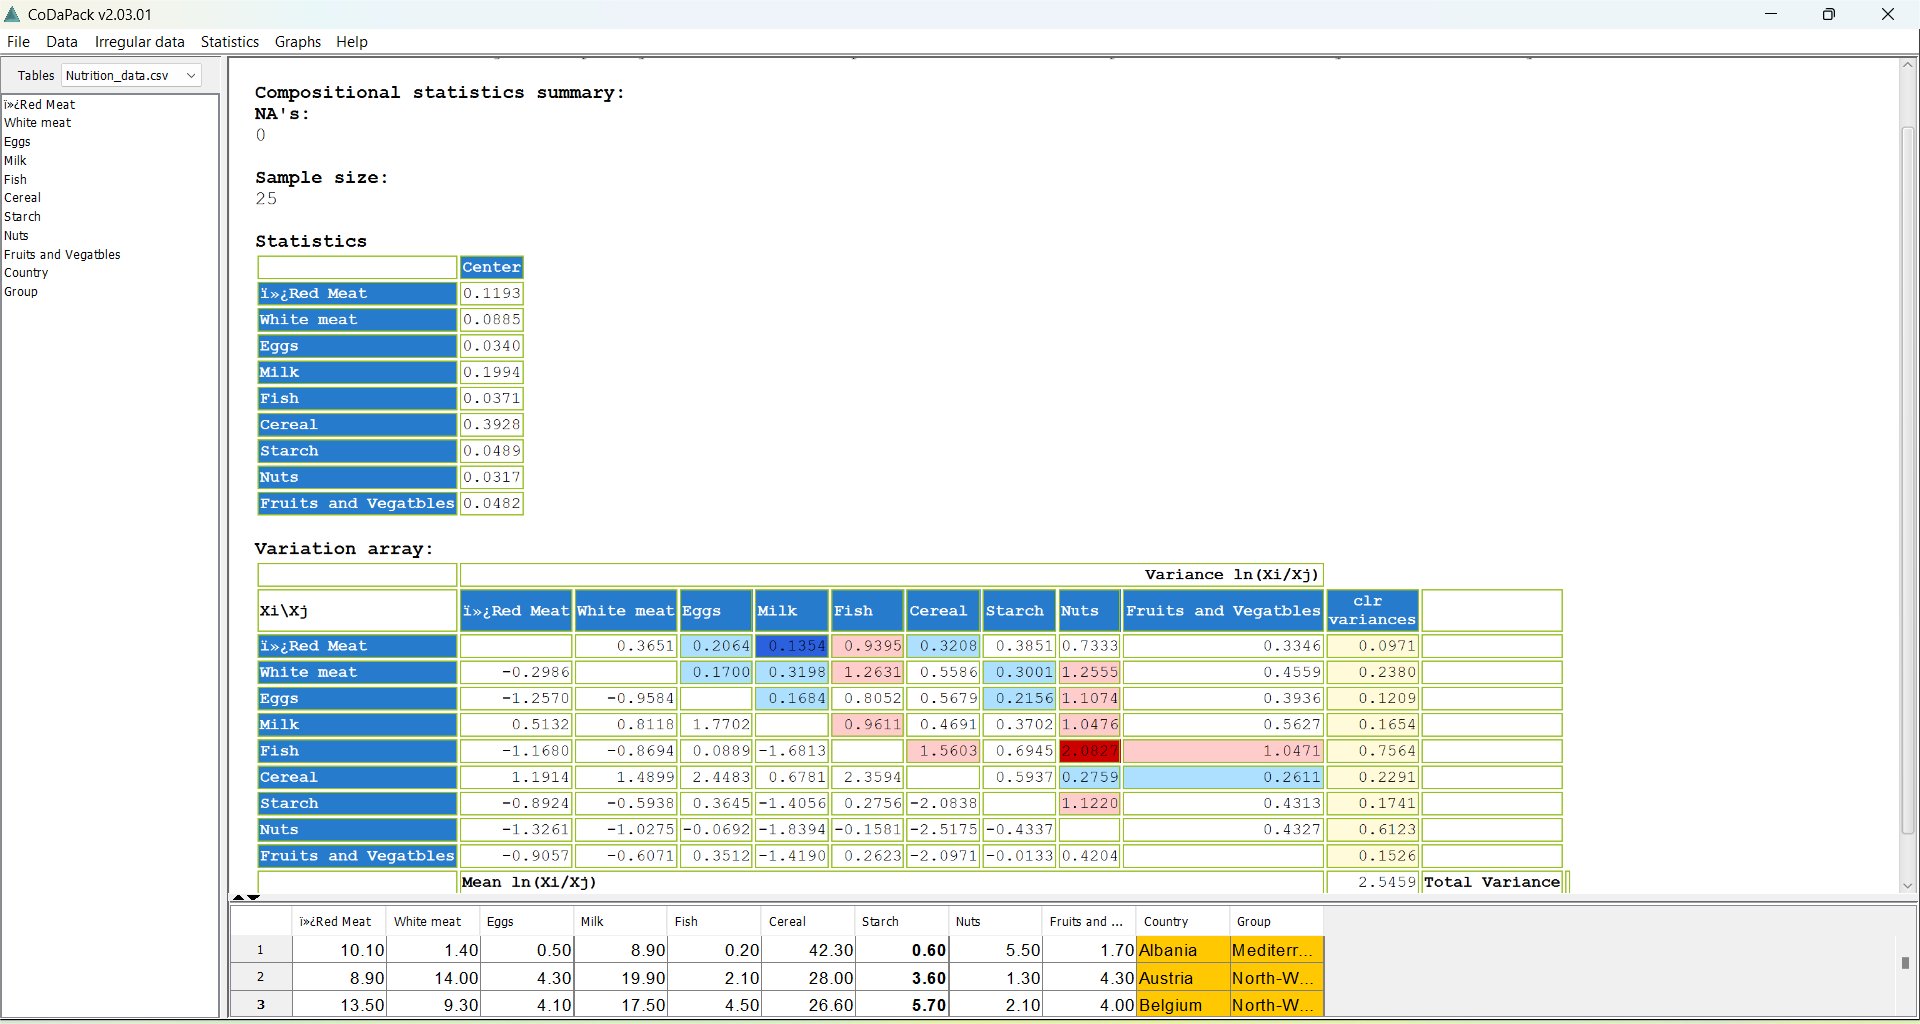

In [ ]:

# Display an image from Drive
from IPython.display import display, Image
image_path = "/content/drive/My Drive/Screenshot (35).png"
display(Image(filename=image_path))


The red boxes with high values like that of nuts and fish indicate that these components have a high degree of variation in their log-ratio. This suggests that these components are not in a fixed proportional relationship and could be influenced easily by external factors suggesting that their behavior should be closely analyzed to gain a deeper understanding of the population.

As for log-ratios consider important to look at, we should prioritize log-ratios involving components that show extreme values (either high or low) in the variation array created above. Notably, Fish and Nuts have the highest values in the variation array, highlighting a significant degree of variation in their log-ratio. These ratios primarily occur between Fish, Nuts, and Fruits & Vegetables.

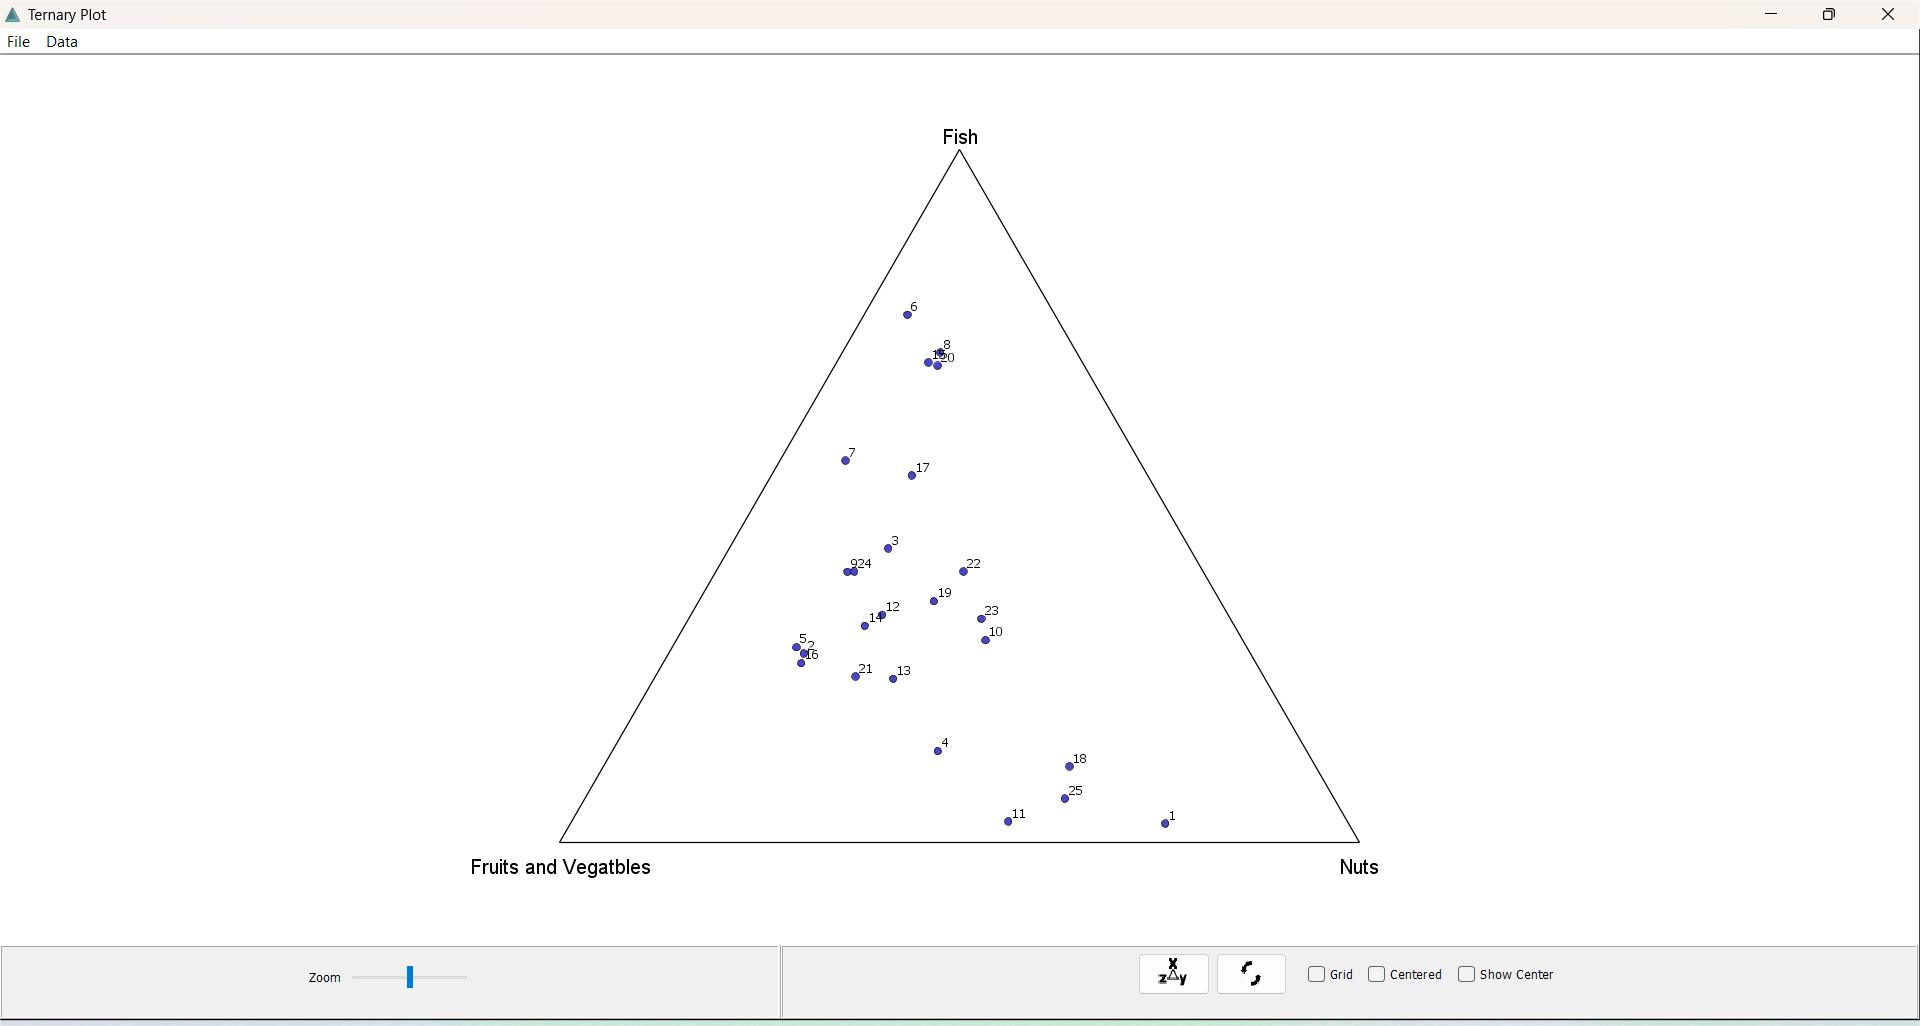

In [ ]:

# Display an image from Drive
from IPython.display import display, Image
image_path = "/content/drive/My Drive/Screenshot (54).png"
display(Image(filename=image_path))


In this case I think Centering wouldn't be necessary as we can observe a particular pattern in the plot for countrie. As much as centering in compositional data analysis removes the scale effect and focuses on relative proportions. However, the raw compositions already exhibit a clear pattern so, I think centering may not be necessary.

Yes from the plot I can observe some pattern from different coutries, that some countries form some type of grouping or rather cluters towards a pardicular food product.

Yes, there are differences I observed between the traditional analysis(without CoDA) and the CODA approach. The most important differences where;

Traditional statistical analysis relies on absolute values, which can be affected by scale differences, whereas CODA focuses on relative proportions, making it invariant to measurement scale. Also, In CODA, some countries that appeared normal in traditional analysis stood out as outliers due to proportional imbalances, which are not evident when using raw data. My last observation was; CODA provided a clearer understanding of relationships between variables using log-ratios, and ternary plots which help in identifying natural clusters among countries, which may not be as visible in standard statistical analysis.

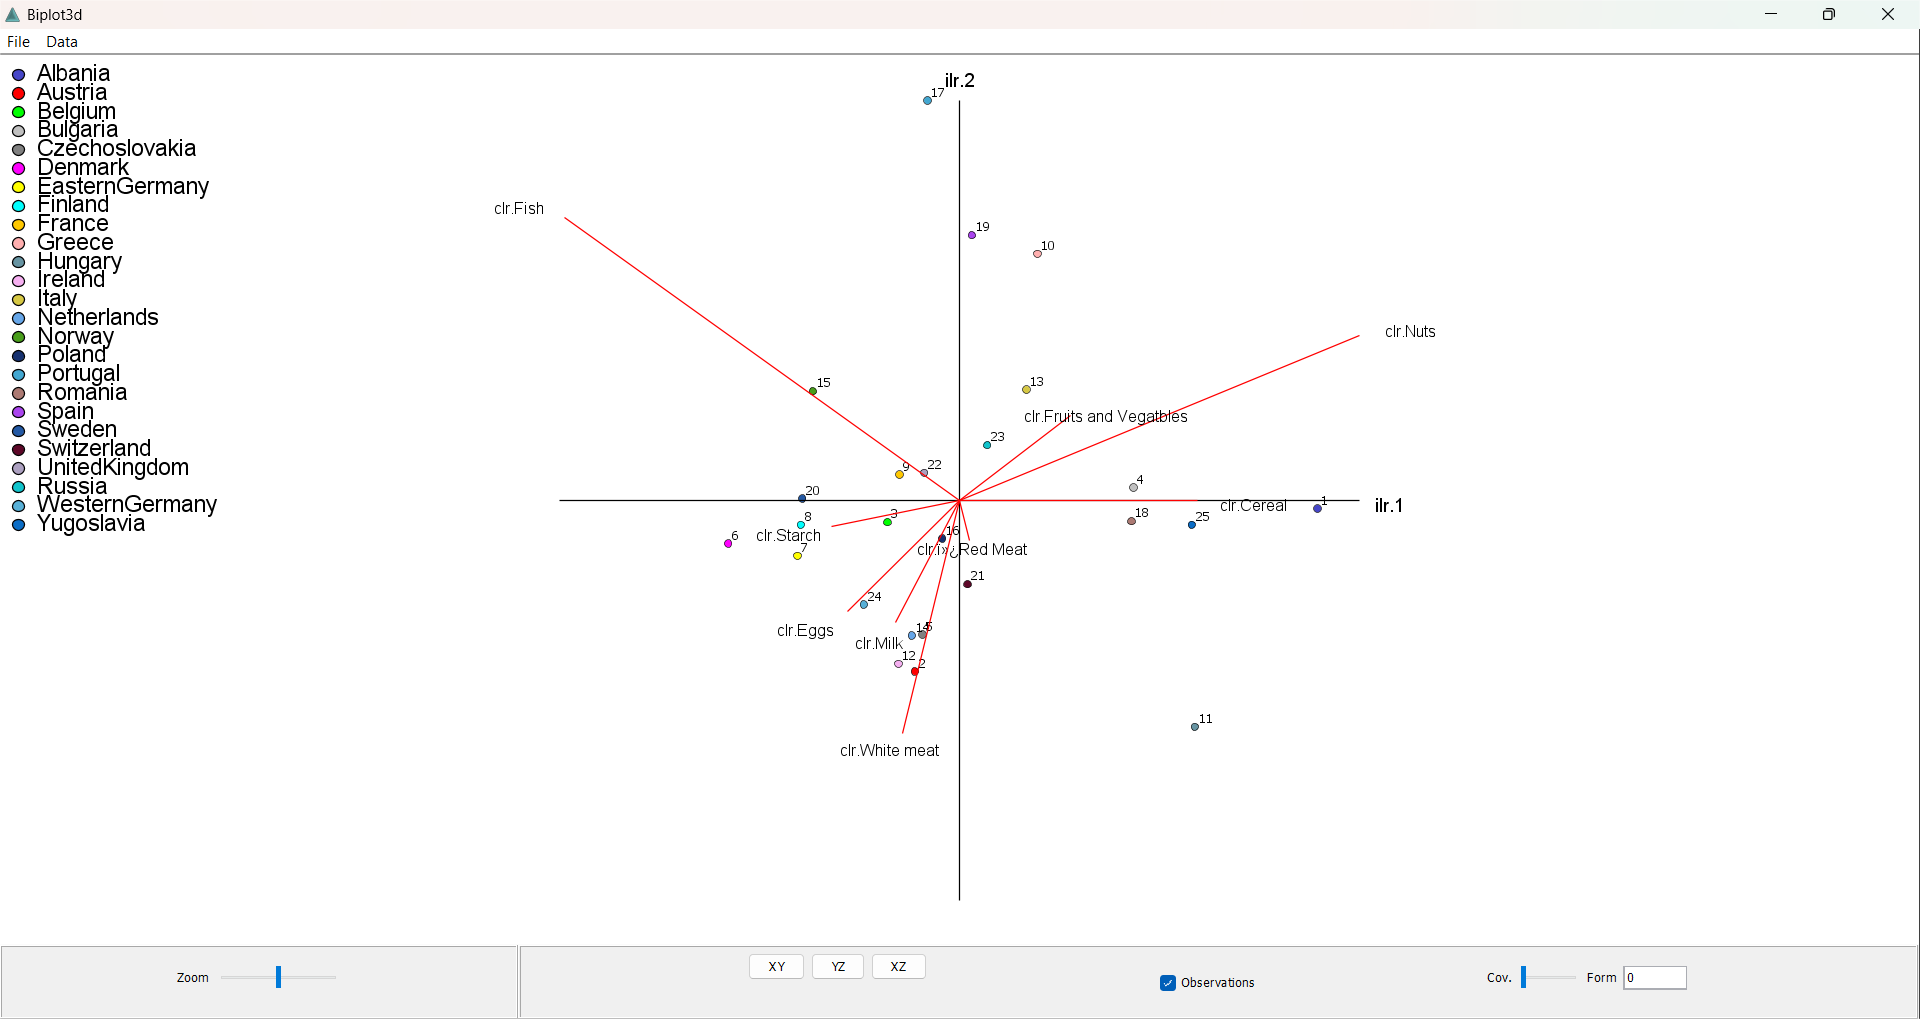

In [ ]:

# Display an image from Drive
from IPython.display import display, Image
image_path = "/content/drive/My Drive/Screenshot (36).png"
display(Image(filename=image_path))

The Fish and Nuts axes appear nearly perpendicular to each other, indicating a very low correlation. In contrast, Milk, Eggs, and Red Meat seem to be highly correlated with their vectors pointing in the same direction.

The red lines in the biplot represent different food categories and behave like vectors. Those pointing in the same direction indicate a positive correlation between components, whereas those pointing in different directions suggest little to no correlation. Additionally, the varying lengths of these vectors indicate the degree of variability i.e longer vectors, such as those for Fish and Nuts, suggest higher variation in consumption patterns across countries.

Countries grouped closely together share similar dietary habits, while those more dispersed exhibit distinct consumption patterns. For instance, countries aligned with the Red Meat or Cereal vectors likely have higher consumption of those food types. Some food categories also show an inverse relationship, such as countries consuming more Red Meat tending to consume fewer Fruits and Vegetables.

The biplot further highlights a few countries positioned far from the main cluster, indicating unique dietary patterns. Investigating these outliers could provide valuable insights into the factors influencing their nutrition choices, making this Biplot an important part of our analysis.

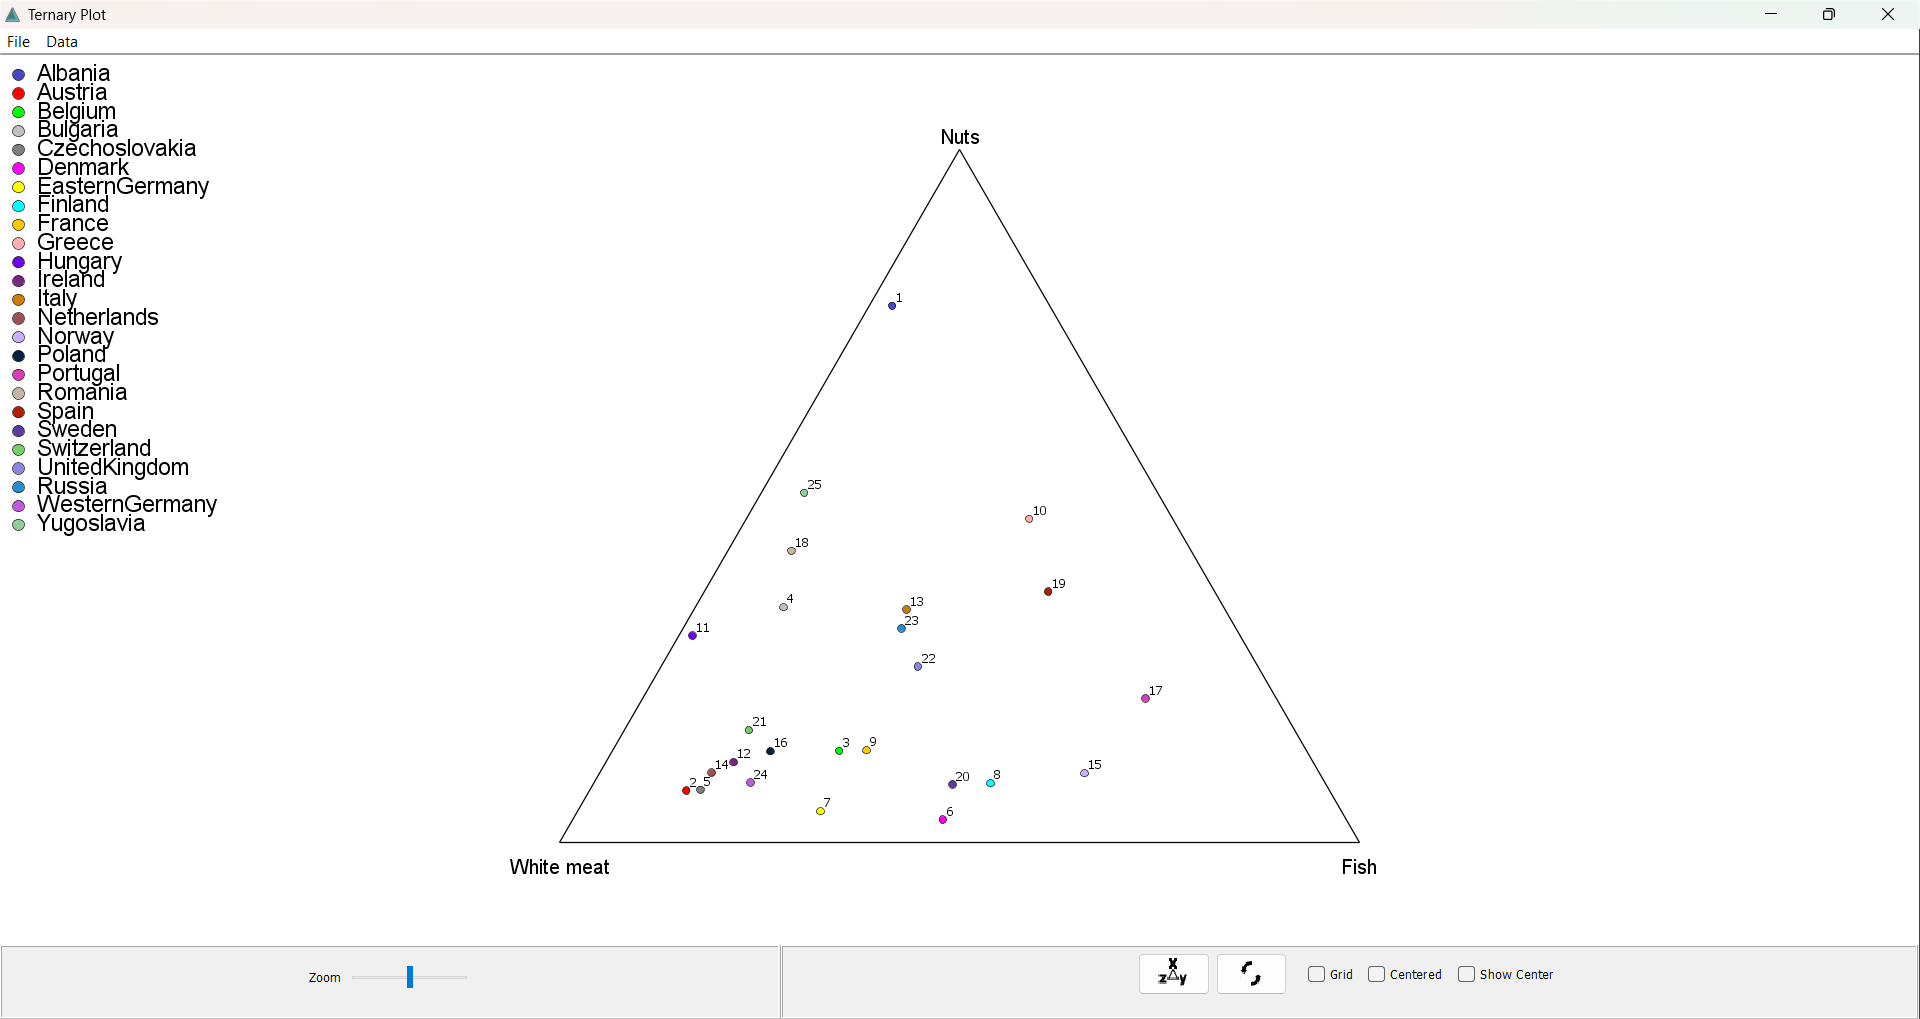

In [ ]:

# Display an image from Drive
from IPython.display import display, Image
image_path = "/content/drive/My Drive/Screenshot (37).png"
display(Image(filename=image_path))

Now observing the three variables in both the ternary diagram and the biplot, it can be said that they provide a well-distributed spread, are not highly correlated, and can be considered independent. Specifically, Fish and Nuts are highly uncorrelated, while White Meat, though not as uncorrelated, still shows a significant lack of correlation with the other two.

The ternary diagram above represents the subcomposition of Nuts, White Meat, and Fish across different countries. Each point represents a country, and the proportion of each food group in the diet determines its position within the triangle.

As seen, countries positioned towards the top of the ternary plot have a higher proportion of Nuts in their diet. Albania appears closer to the Nuts vertex, suggesting a greater reliance on Nuts compared to White Meat and Fish. This also makes Albania an outlier to some sense.

This basically means that countries positioned near the left corner have a diet richer in White Meat. Similarly, countries positioned to the right seem to favor Fish.

The Ternary Diagram has also been able to show some groupings for different countries, creating some sort of clusters. In the Ternary Diagram, countries 2, 5, 12, 14, 24, 16, and 21 form a cluster consuming more White Meat.

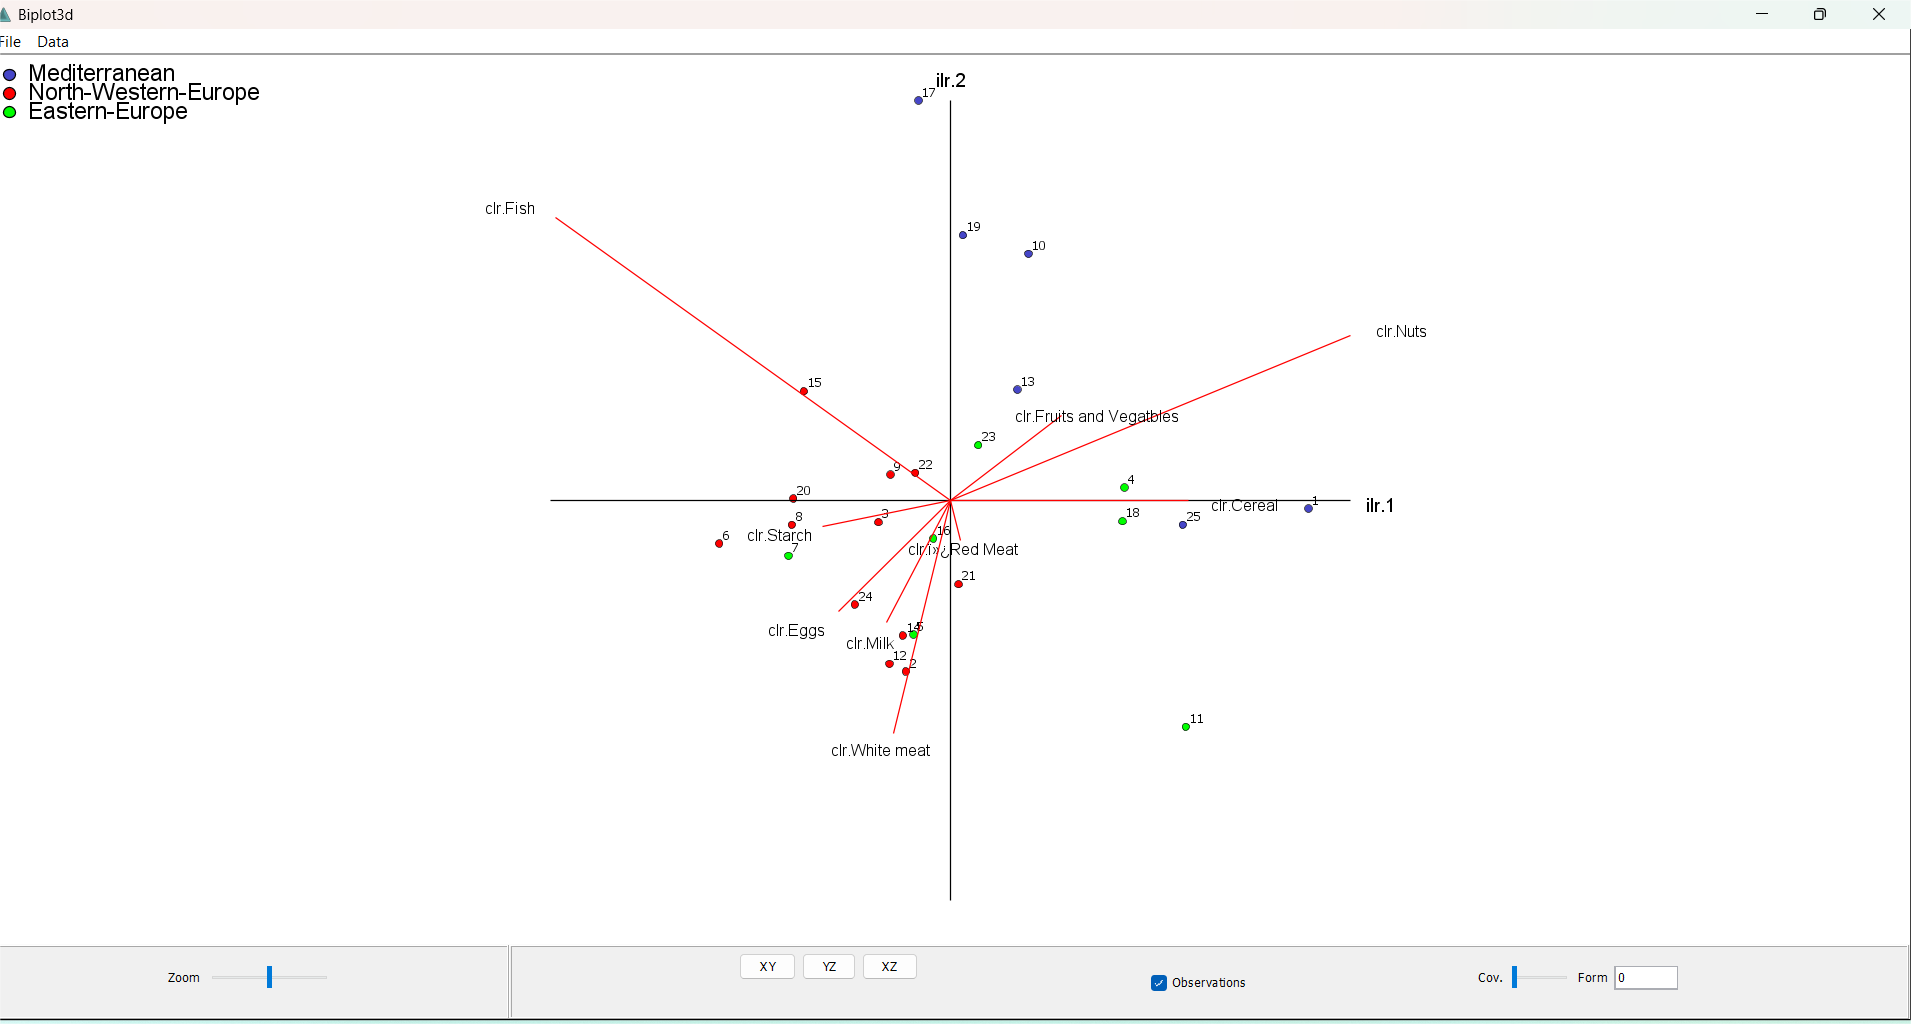

In [ ]:

# Display an image from Drive
from IPython.display import display, Image
image_path = "/content/drive/My Drive/Screenshot (38).png"
display(Image(filename=image_path))


Mediterranean countries have a clear preference for nuts, setting them apart from other regions.

Countries in North-Western Europe strongly favor White Meat, likely due to dietary preferences and availability. Clusters are formed for foods like starch, and milk for these countrie.

Unlike the Mediterranean and North-Western Europe, Eastern European diets are more diverse, with no single dominant food preference.

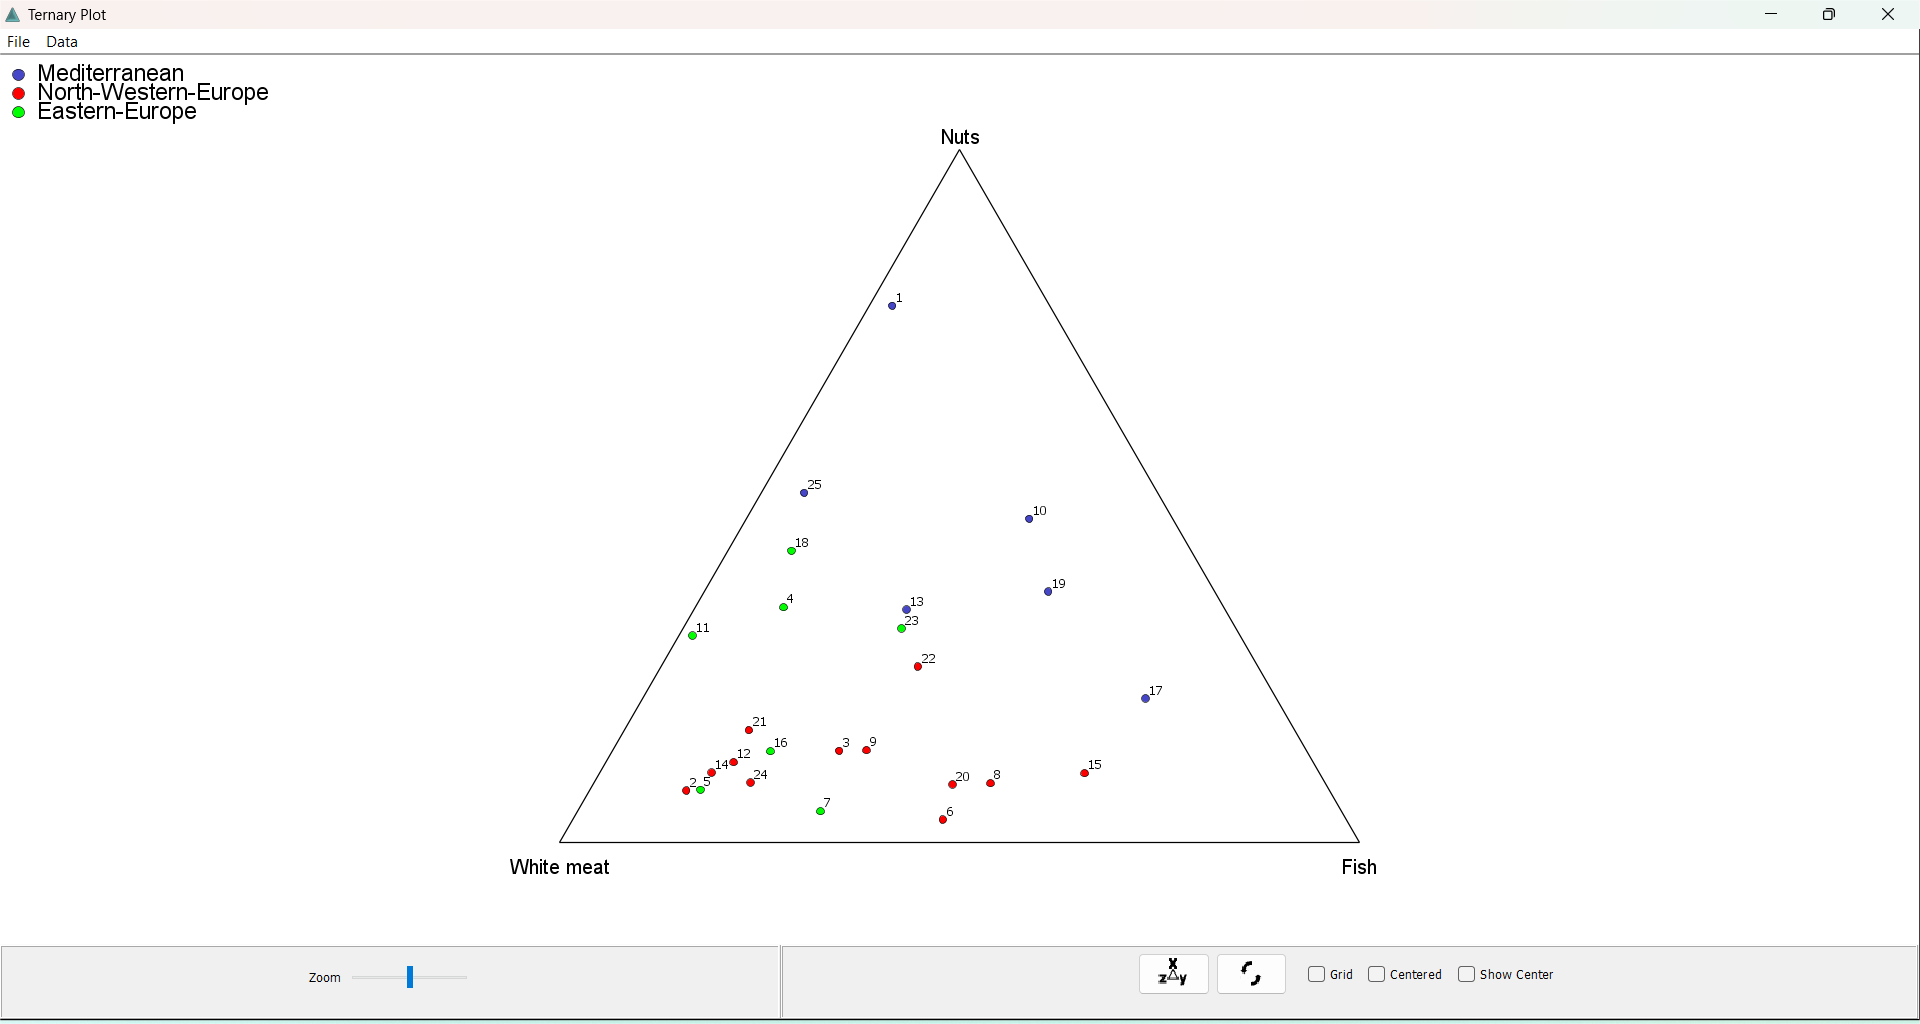

In [ ]:

# Display an image from Drive
from IPython.display import display, Image
image_path = "/content/drive/My Drive/Screenshot (39).png"
display(Image(filename=image_path))


From the graph, some important conclusions from this study about the food consumption in Europe are; The Mediterranean region marked in blue dots consume a relatively higher proportion of Nuts compared to other regions. Countries like 1, 10, 19, 25 are positioned towards the Nuts vertex, confirming the emphasis on nuts in their diet. Fish consumption is also moderately high in some Mediterranean countries, country 17 is closer to the Fish vertex, aligning with the traditional Mediterranean diet, which includes seafood.

Countries from North-Western Europe have a higher proportion of White Meat and Fish in their diets. They are generally clustered near the bottom of the ternary plot as seen in the graph, indicating lower nut consumption. Some countries, such as 15, 8, 20, and 6, show a greater reliance on fish compared to white meat, possibly indicating strong coastal influences. Thee countries basically form some sort of a cluster. Others, such as 21, 2, 24, 12, and 14, are positioned closer to White Meat, suggesting a diet that leans towards meat consumption over nuts or fish.

Eastern European countries appear to have more balanced proportions of all three food categories but less of fish. As seen in the graph above, the spread of green points is relatively wide, suggesting greater dietary diversity within this group.

To answer part f I will run the clustering algorithm solely on the nutrition dataset, based on what they eat.


Cluster vs Geographic Group Comparison:
Group         Eastern-Europe  Mediterranean  North-Western-Europe
kmeans_label                                                     
0                          0              0                    12
1                          3              3                     0
2                          4              3                     0


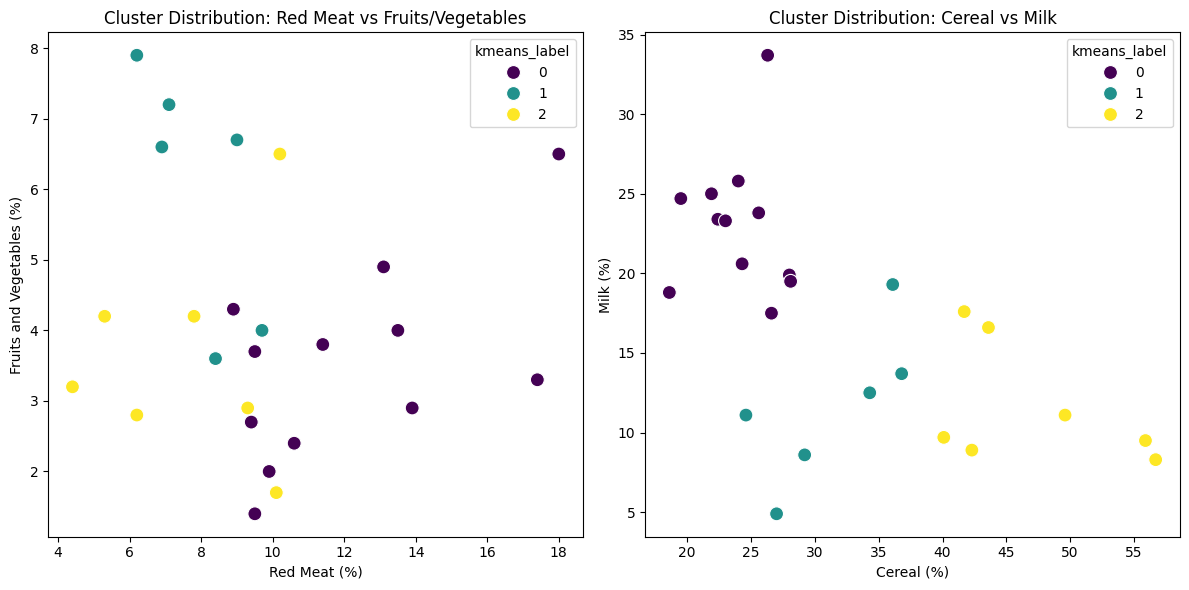

In [ ]:
# Here we perform K-means clustering with cluster num of 3
cluster_num = 3
kmeans = KMeans(n_clusters=cluster_num, random_state=0).fit(nutrition_data.iloc[:, :9])
nutrition_data['kmeans_label'] = kmeans.labels_
cluster_centers = kmeans.cluster_centers_

# And the compare clusters with geographic groups
cluster_group_comparison = pd.crosstab(
    nutrition_data['kmeans_label'],
    nutrition_data['Group']
)
print("\nCluster vs Geographic Group Comparison:")
print(cluster_group_comparison)

# We can also visualize clusters using two nutritional features this is only for insight
plt.figure(figsize=(12, 6))

# First I'll visualize Red Meat vs Fruits and Vegatbles
plt.subplot(1, 2, 1)
sns.scatterplot(
    data=nutrition_data,
    x='Red Meat',
    y='Fruits and Vegatbles',
    hue='kmeans_label',
    palette='viridis',
    s=100
)
plt.title('Cluster Distribution: Red Meat vs Fruits/Vegetables')
plt.xlabel('Red Meat (%)')
plt.ylabel('Fruits and Vegetables (%)')

# And then Cereal vs Milk
plt.subplot(1, 2, 2)
sns.scatterplot(
    data=nutrition_data,
    x='Cereal',
    y='Milk',
    hue='kmeans_label',
    palette='viridis',
    s=100
)
plt.title('Cluster Distribution: Cereal vs Milk')
plt.xlabel('Cereal (%)')
plt.ylabel('Milk (%)')

plt.tight_layout()
plt.show()


The K-means clustering revealed three distinct groups with clear dietary patterns that partly align with, but also diverge from, geographic regions; Cluster 0 strongly matches North-Western Europe 12 out of 25 countries, reflecting a similar dietary profile. Cluster 1 and Cluster 2 , however, mix Eastern-European and Mediterranean countries , suggesting shared nutritional traits that transcend geographic boundaries. This implies that while some regions like North-Western Europe have distinct diets, others Eastern and Mediterranean share overlapping dietary habits.

# This is problem 2

## Exploratory Data Analysis (EDA) of Groundwater Quality in California Central Valley Without/with Using CODA.

In this analysis of groundwater quality in the California Central Valley dataset, the primary goal is to conduct an exploratory data analysis (EDA) to identify the most interesting patterns and relationships within the given dataset, which can guide further investigations. Firstly I'll conduct the analysis without uing CODA to provide what we believe are the most interesting plots that reveal key insights into the geochemical processes occurring in the region. The first part of the analysis focuses on loading the data, preprocess the data, look at the summary statistics and the pairwise correlation matrix, which offer foundational insights for understanding how different geochemical elements such as Cr(VI), Mn, Fe, NO3, SO4, and others behave across various groundwater samples. However, I wont focus on the geochemist's role but rather the data insights and interpretations.

## Bullet Point One: Summary Statistics

In [ ]:
# Now I'll load my data which i have renamed hw2.csv for easy reading.

file_path = "/content/drive/My Drive/hw2.csv"

def data(file_path: str) -> pd.DataFrame:
    """Here I Load and display basic information of the given dataset, I'll simply just name it data"""
    try:
        df = pd.read_csv(file_path)
        print(f"Rows: {df.shape[0]}, Columns: {df.shape[1]}")
        print("\nFirst 5 rows:")
        print(df.head())
        return df
    except Exception as e:
        print(f"Error: {e}")
        return None

# Here we Load the dataset
data = data(file_path)


Rows: 683, Columns: 29

First 5 rows:
    Latitude   Longitude SOURCE  SOURCE.NAM  OTHER.NAME     WELL.ID  Al (ppb)  \
0  39.767667 -121.781556   USGS  CAMP-ES-15  CAMP-ES-15  CAMP-ES-15       2.6   
1  37.757111 -120.799278   USGS   CE-QPC-01   CE-QPC-01   CE-QPC-01       6.6   
2  37.757111 -120.799278   USGS   CE-QPC-01   CE-QPC-01   CE-QPC-01       1.5   
3  38.287528 -121.328972   USGS      COS-08      COS-08      COS-08       3.4   
4  38.287528 -121.328972   USGS      COS-08      COS-08      COS-08       1.3   

   As (ppb)  Ba (ppb)  Ca (ppb)  ...  Ni (ppb)  NO3 (ppb)  Pb (ppb)  Se (ppb)  \
0      0.79      8.62     17700  ...      0.28        474     0.341      0.05   
1      1.20     43.10     24400  ...      1.18       4390     2.690      0.05   
2      1.30     43.20     22800  ...      0.20       4340     1.130      0.08   
3     21.90    154.00      9430  ...      0.20        238     0.040      0.09   
4     21.50    152.00      9470  ...      0.21        298     0.080   

In [ ]:
# Before looking at the summary stats, I'll check for any missing values.

print("Missing Values:\n", data.isnull().sum())

Missing Values:
 Latitude      0
Longitude     0
SOURCE        0
SOURCE.NAM    0
OTHER.NAME    0
WELL.ID       0
Al (ppb)      0
As (ppb)      0
Ba (ppb)      0
Ca (ppb)      0
Cl (ppb)      0
Cr (ppb)      0
Cu (ppb)      0
F (ppb)       0
Fe (ppb)      0
K (ppb)       0
Mg (ppb)      0
Mn (ppb)      0
Mo (ppb)      0
Ni (ppb)      0
NO3 (ppb)     0
Pb (ppb)      0
Se (ppb)      0
SO4 (ppb)     0
Sr (ppb)      0
U (ppb)       0
V (ppb)       0
Zn (ppb)      0
Cr_level      0
dtype: int64


Well we happen not to have any missing values in our data, which is great!


In [ ]:
#This is the Summary Statistics (Mean & Standard Deviation) for the given dataset respectively.

summary_stats = data.describe().T[['mean', 'std']]
print("\nSummary Statistics (Mean & Std Dev):")
print(summary_stats)


Summary Statistics (Mean & Std Dev):
                   mean            std
Latitude      37.706735       1.403051
Longitude   -120.756262       1.049880
Al (ppb)       8.444802      52.907461
As (ppb)       6.249004      13.598172
Ba (ppb)     115.395461     278.938183
Ca (ppb)   48163.106881   62228.573187
Cl (ppb)   76739.341142  261466.163699
Cr (ppb)       3.110996       4.708021
Cu (ppb)       1.557174       1.742745
F (ppb)      216.251830     286.801567
Fe (ppb)     110.743192    1067.856147
K (ppb)     2683.748170    2196.518308
Mg (ppb)   20761.102489   28938.214764
Mn (ppb)      99.855608     747.059257
Mo (ppb)       4.817659      12.135596
Ni (ppb)       1.001903       2.552925
NO3 (ppb)   4045.368960    6615.122303
Pb (ppb)       0.544381       2.431069
Se (ppb)       0.901274       3.413577
SO4 (ppb)  76275.651537  179598.311265
Sr (ppb)     518.475666     666.279904
U (ppb)        9.875018      33.846140
V (ppb)       14.477613      13.159729
Zn (ppb)      13.698272   

The above summary statistics of the dataset including the mean and standard deviation, provide key visible insights into the overall distribution and variability of the groundwater samples. The mean values of several key elements, such as Calcium (Ca) and Chloride (Cl), are quite high. Also their standard deviations are also large indicating substantial variability in the concentrations of these elements.From the summary stats it can also be observed that Manganese (Mn) and Chromium (Cr) show relatively lower mean concentrations but both elements have large standard deviations reflecting significant spatial variability. These variations are crucial for understanding the complex processes.

All specified columns are present in the dataset.
Columns included in analysis: ['Al (ppb)', 'As (ppb)', 'Ba (ppb)', 'Ca (ppb)', 'Cl (ppb)', 'Cr (ppb)', 'Cu (ppb)', 'F (ppb)', 'Fe (ppb)', 'K (ppb)', 'Mg (ppb)', 'Mn (ppb)', 'Mo (ppb)', 'Ni (ppb)', 'NO3 (ppb)', 'Pb (ppb)', 'Se (ppb)', 'SO4 (ppb)', 'Sr (ppb)', 'U (ppb)', 'V (ppb)', 'Zn (ppb)']

Missing Values:
 Series([], dtype: int64)


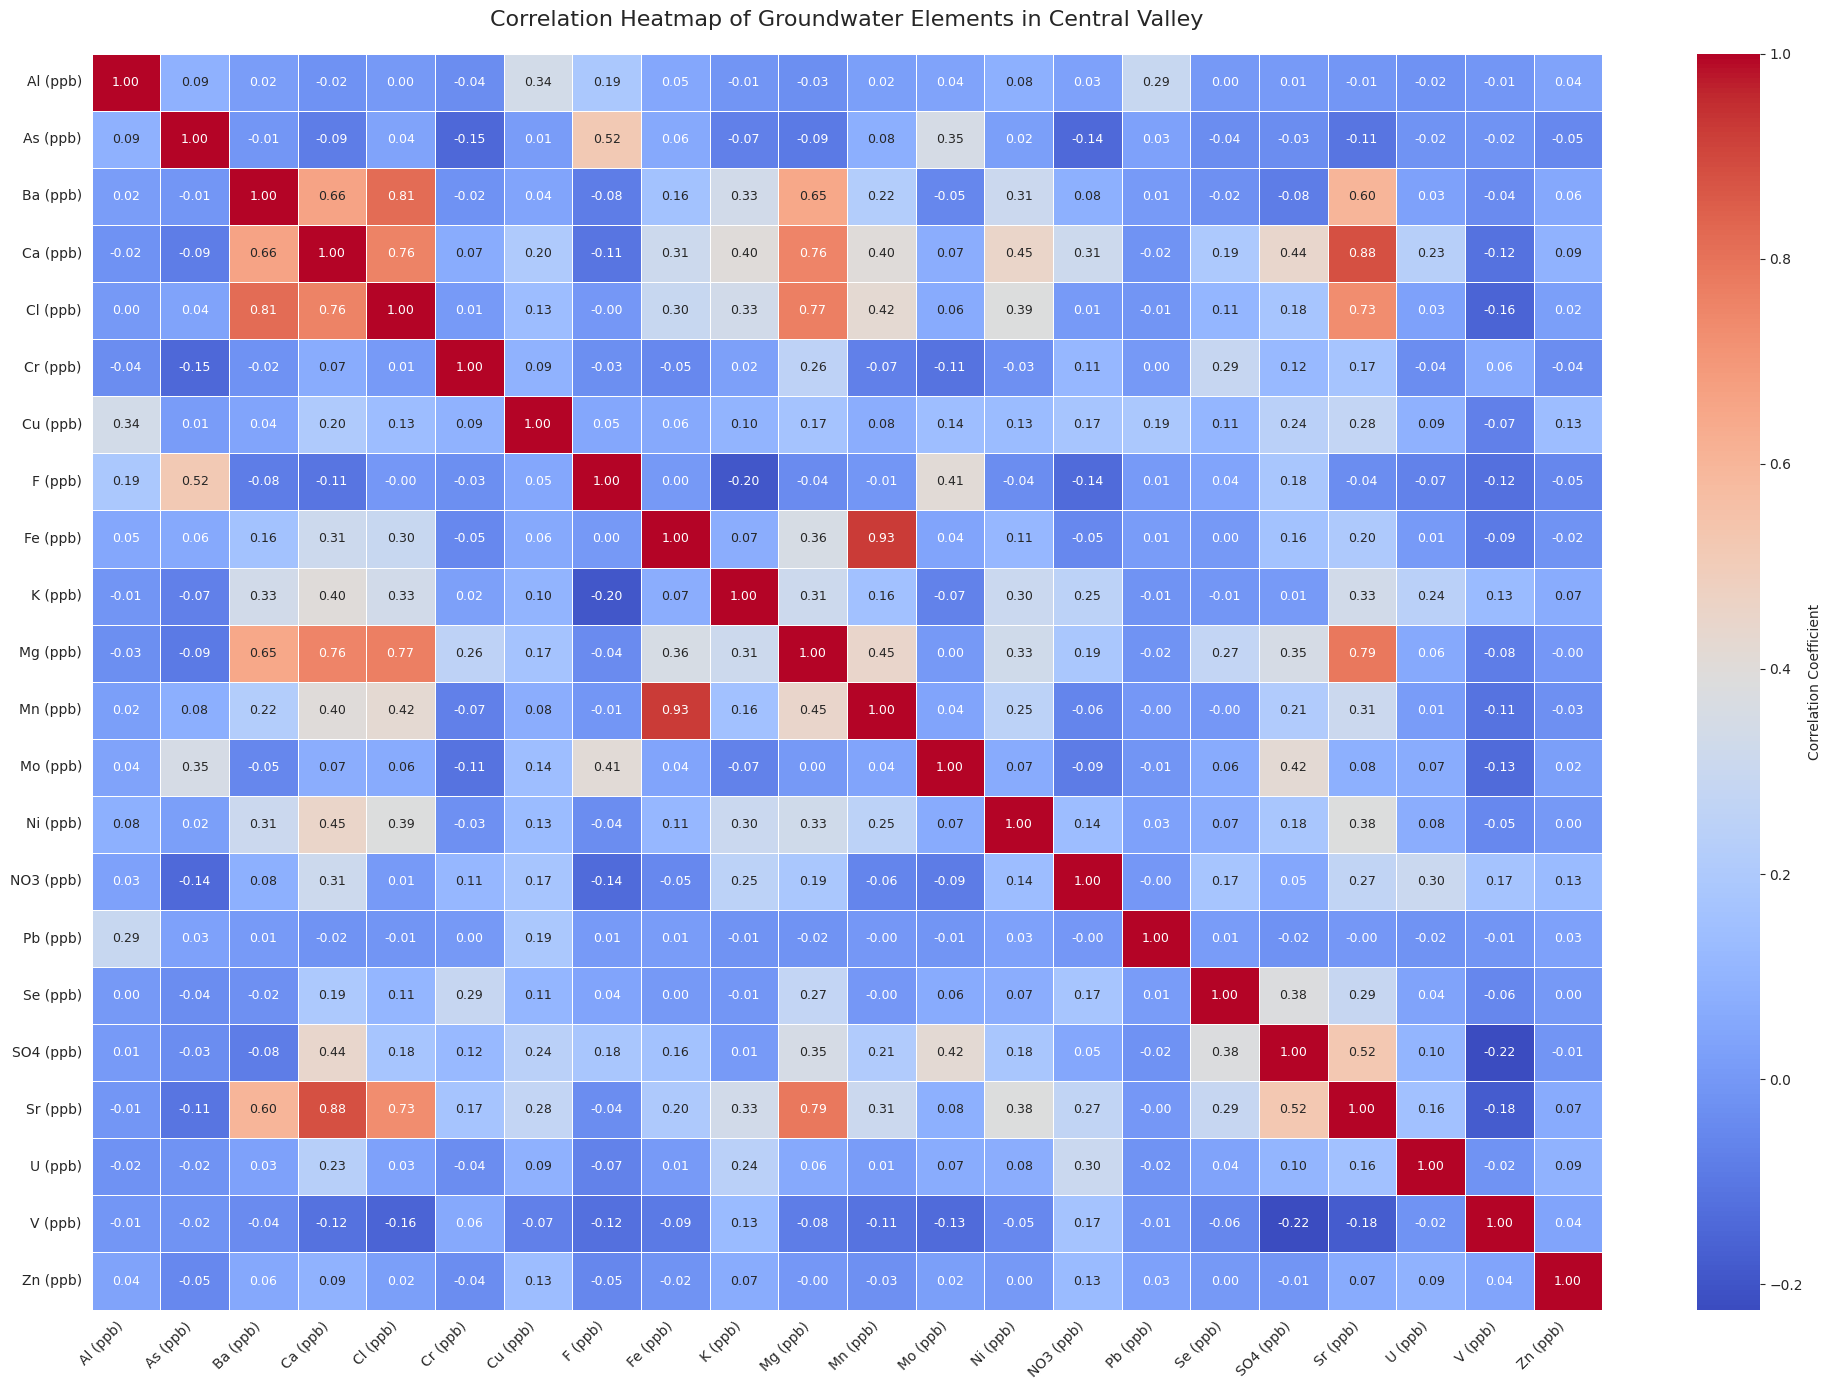

In [ ]:


# Here we plot the correlation matrix for the dataset as part of the problemset
data.columns =data.columns.str.strip()
element_columns = [
    'Al (ppb)', 'As (ppb)', 'Ba (ppb)', 'Ca (ppb)', 'Cl (ppb)', 'Cr (ppb)',
    'Cu (ppb)', 'F (ppb)', 'Fe (ppb)', 'K (ppb)', 'Mg (ppb)', 'Mn (ppb)',
    'Mo (ppb)', 'Ni (ppb)', 'NO3 (ppb)', 'Pb (ppb)', 'Se (ppb)', 'SO4 (ppb)',
    'Sr (ppb)', 'U (ppb)', 'V (ppb)', 'Zn (ppb)',
]

# After liting the columns we verify columns existance in the dataset
existing_cols = [col for col in element_columns if col in data.columns]
missing_cols = set(element_columns) - set(existing_cols)

if missing_cols:
    print(f"Warning: The following columns are missing and will be ignored: {missing_cols}")
else:
    print("All specified columns are present in the dataset.")

print("Columns included in analysis:", existing_cols)

# For this plot to load, we need to ensure selected columns are numeric (coerce errors to NaN if necessary)
data[existing_cols] = data[existing_cols].apply(pd.to_numeric, errors='coerce')

# Wouldn't hurt much to recheck for missing values in our dataset before ploting
missing_values = data[existing_cols].isnull().sum()
print("\nMissing Values:\n", missing_values[missing_values > 0])

# Now we can plot the correlation matrix

corr_matrix = data[existing_cols].corr()

plt.figure(figsize=(20, 14))
sns.set_style("whitegrid")

# Now we can create a heatmap with annotations for easy referencing
heatmap = sns.heatmap(
    corr_matrix,
    annot=True,
    fmt=".2f",
    cmap="coolwarm",
    linewidths=0.5,
    annot_kws={"size": 9},
    cbar_kws={"label": "Correlation Coefficient"}
)

heatmap.set_title(
    "Correlation Heatmap of Groundwater Elements in Central Valley",
    fontsize=16,
    pad=20
)
heatmap.set_xticklabels(heatmap.get_xticklabels(), rotation=45, ha="right", fontsize=10)
heatmap.set_yticklabels(heatmap.get_yticklabels(), fontsize=10)

plt.tight_layout()
plt.savefig("groundwater_element_correlation.png", dpi=300, bbox_inches="tight")
plt.show()

The pairwise correlation matrix reveals some interesting relationships between elements. From the plot it is observed that we have more of the high +ve value correlations and less -ve value correlations for example, a noticeable positive correlation between Manganese (Mn) and Iron (Fe) suggests a potential link in the oxidation process of Cr(III) to Cr(VI). These correlations, alongside the variability observed in the summary statistics, provide a foundation for further detailed exploration of the groundwater system's geochemistry.

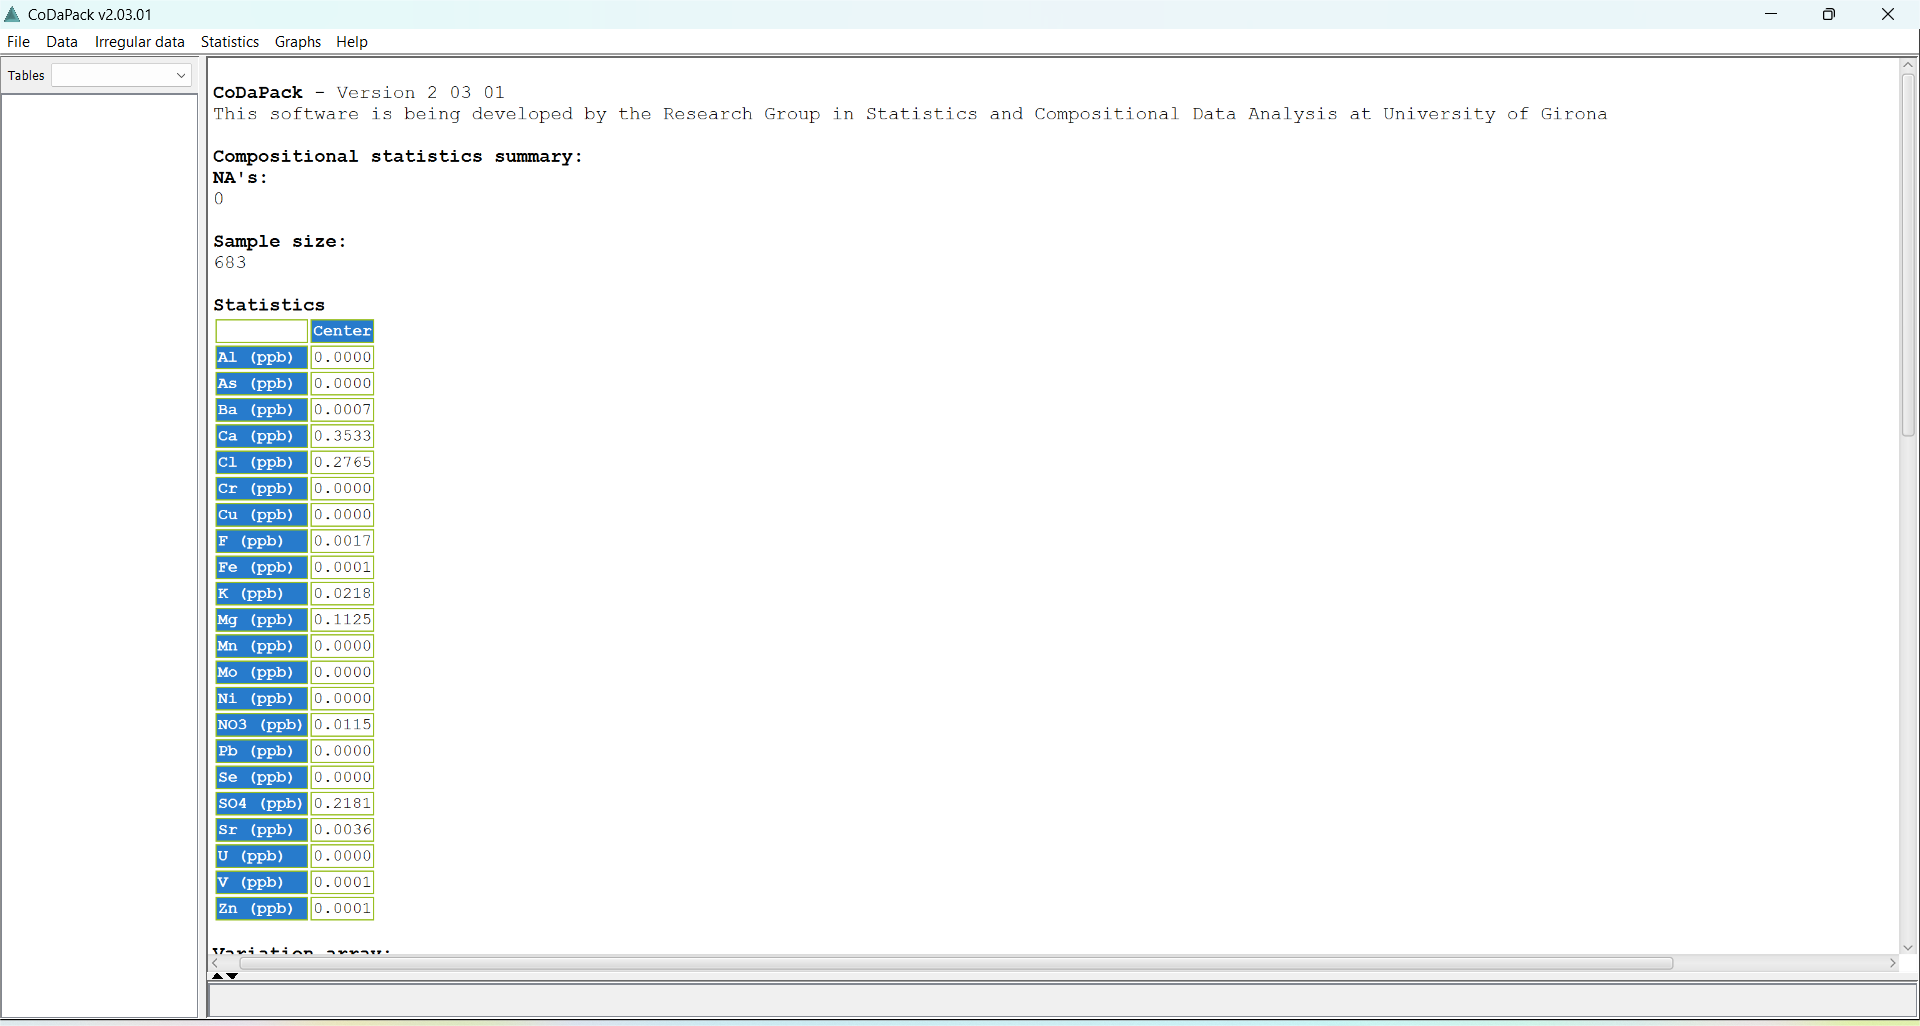

In [ ]:

# Display an image from Drive
from IPython.display import display, Image
image_path = "/content/drive/My Drive/Screenshot (47).png"
display(Image(filename=image_path))

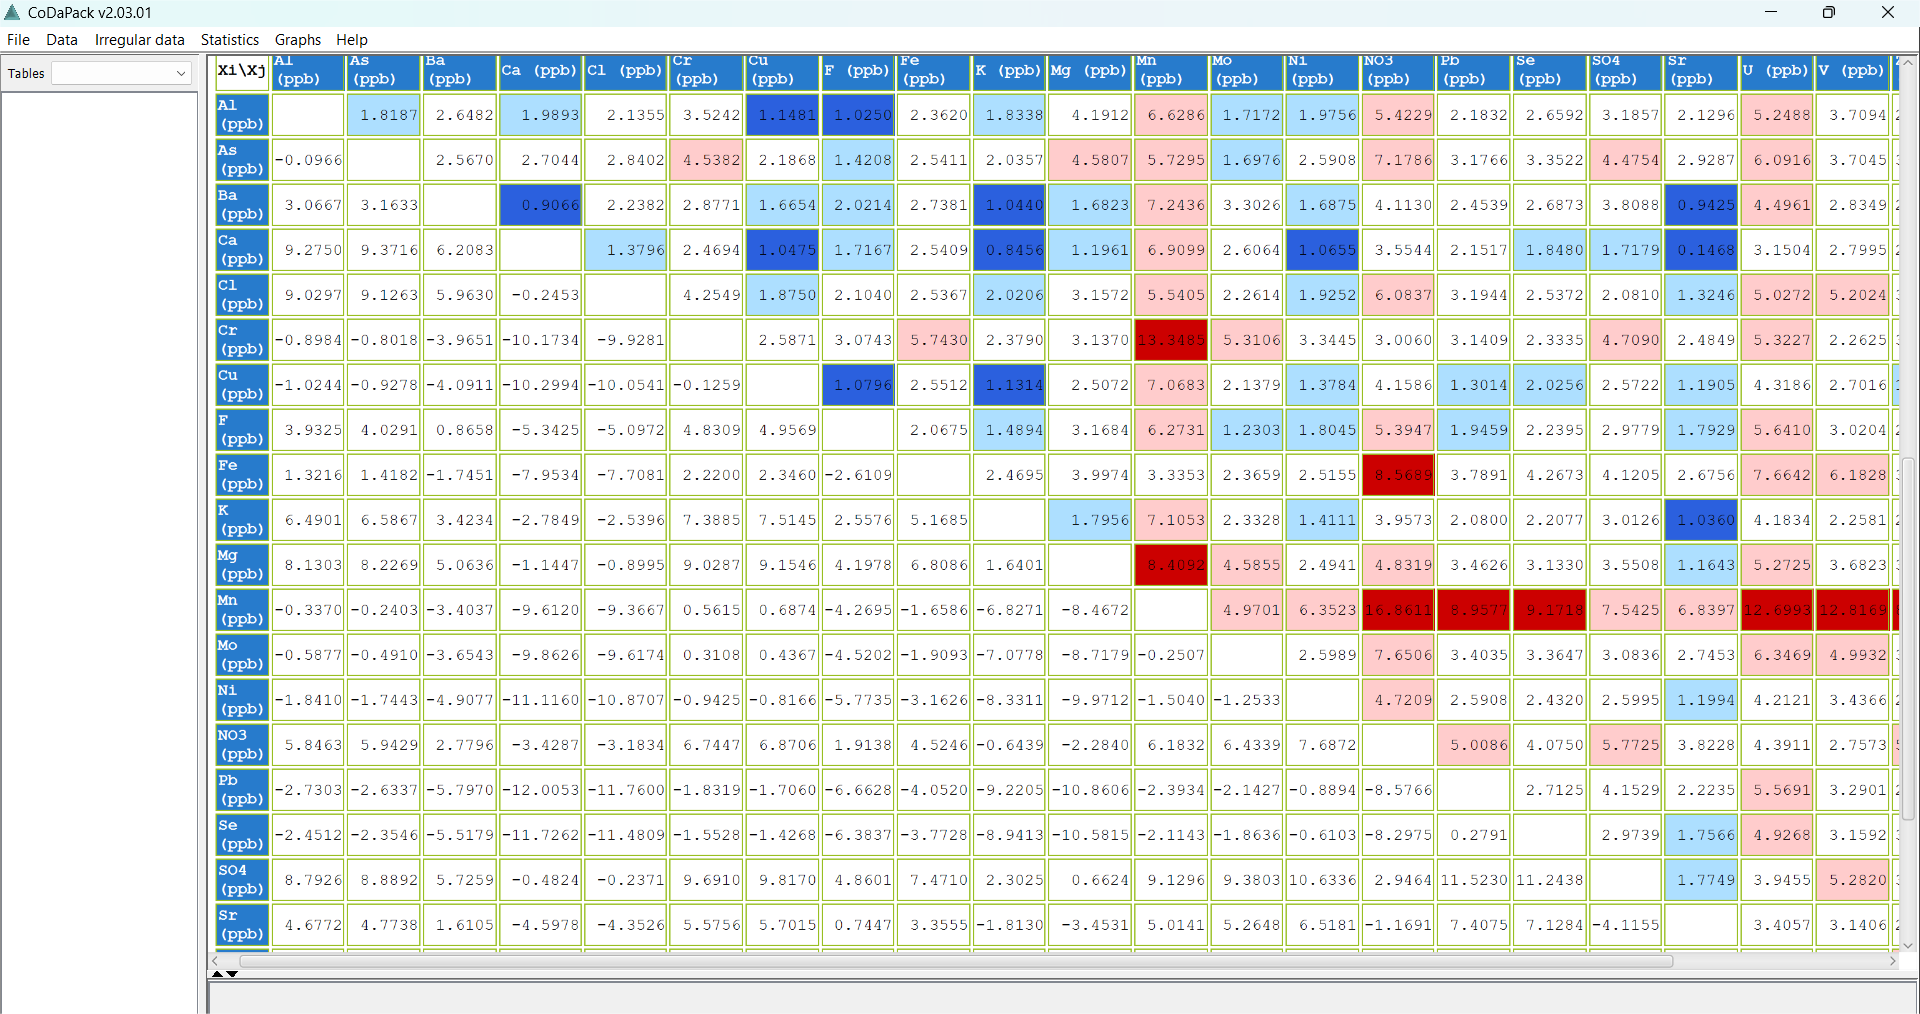

In [ ]:

# Display an image from Drive
from IPython.display import display, Image
image_path = "/content/drive/My Drive/Screenshot (46).png"
display(Image(filename=image_path))

The Variation Array provides us with insight into the relationships between different chemical elements in our dataset through log-ratios. The high values, marked in red, indicate significant variation or variability in the corresponding log-ratio, meaning that the relative proportions of those two elements fluctuate greatly across the given dataset.




The log-ratios I'd consider important to look at are Cr/Mn ratio which is particularly important since Mn acts as a key oxidant that converts Cr(III) to Cr(VI). High variation in this ratio suggests inconsistencies in Mn’s ability to oxidize Cr. Similarly, the NO3/Mn ratio reflects a high variation so, I will consider it important. Another key ratio, Mo/Mn, highlight high value. The U/Mn ratio also the Se/Mn ratio is high so, its a log-ratio is of intrest.

Relating these log-ratios to what is described in the background context of Cr(VI) geochemistry, this is particularly important because Cr(VI) is influenced by redox conditions, the presence of oxidizing or reducing agents, and competing electron acceptors, the high variation in Cr/Mn and Fe/NO3 suggests that these two metals do not have a consistent relationship, possibly due to fluctuating redox conditions. Since Mn is a strong oxidant that promotes the transformation of Cr(III) into Cr(VI), while Fe is often involved in reduction reactions, this could indicate dynamic redox cycling in the environment.

## This is Bullet Point Two: Scatter Plots

Before before plotting scatter plots for log-ratios that I considered important, I firstly want to visualize the direct compositions of the key elements, which will provide insights into how these elements relate to each other in their original, untransformed states. The scatter plots before applying log-ratios can offer a foundational understanding of the raw relationships between key geochemical compositions. After that, log-ratio transformation will help normalize the data and provide more meaningful comparisons, especially in cases where the compositions are highly skewed or show strong variability jut as those seen in red boxes of the variation array generated in CODA above.

In this problem I'll consider the following compositions;

Mn (Manganese) with high values relationg to other compositions and plays a role in redox processes and Cr oxidation, U (Uranium), which is influenced by redox conditions, Se (Selenium), which can also play a role in redox processes, Fe (Iron), Mg (Magnisium), V (Vanadium) and Zn (Zinc), which may provide additional insights into trace element cycling.

Before applying any log-ratio transformations, plotting the compositions directly to visualize the raw relationships between elements will be important. The scatter plots for Mn Vs Cr, NO3 vs Fe, Mg vs Mn, Mn vs U, Mn vs NO3, Mn vs V, and Mn vs Zn to understand their direct relationships. I have chosen these relationships because of their high variability on the varriation array.

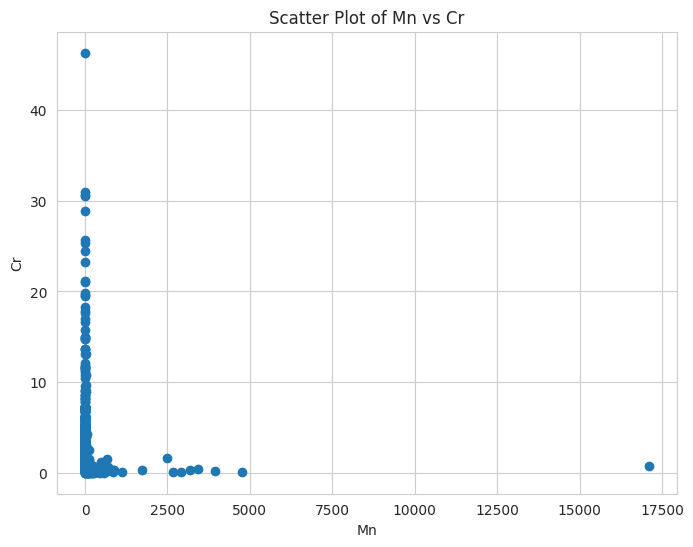

In [ ]:
# Scatter plot of Mn vs Cr
composition1 = data['Mn (ppb)']
composition2 = data['Cr (ppb)']
name1 = 'Mn'
name2 = 'Cr'
plt.figure(figsize=(8, 6))
plt.scatter(composition1, composition2)
plt.xlabel(name1)
plt.ylabel(name2)
plt.title(f'Scatter Plot of {name1} vs {name2}')
plt.show()



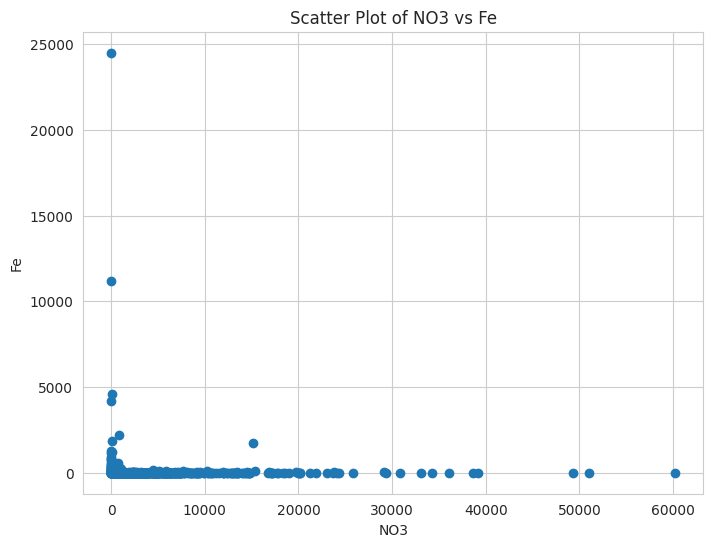

In [ ]:
# Scatter plot before log-ratio for 'NO3' Vs 'Fe'
composition1 = data['NO3 (ppb)']
name1 = 'NO3'
composition2 = data['Fe (ppb)']
name2 = 'Fe'

plt.figure(figsize=(8, 6))
plt.scatter(composition1, composition2)
plt.xlabel(name1)
plt.ylabel(name2)
plt.title(f'Scatter Plot of {name1} vs {name2}')
plt.show()




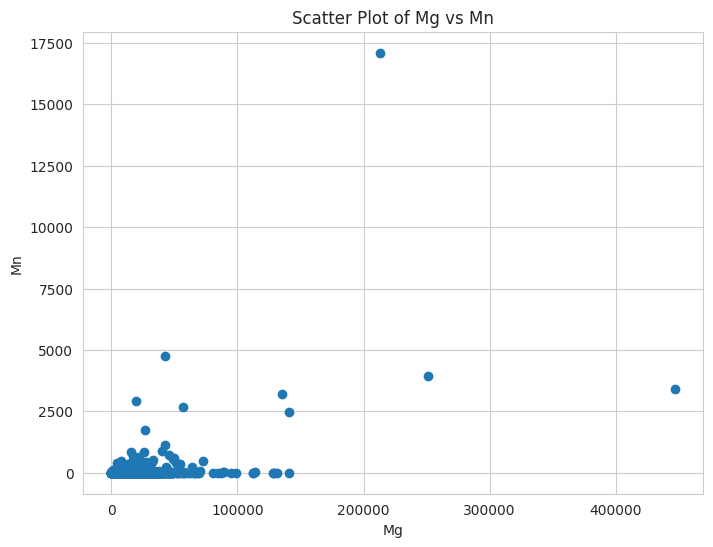

In [ ]:
# Scatter plot before log-ratio for 'Mg' vs 'Mn'
composition1 = data['Mg (ppb)']
name1 = 'Mg'
composition2 = data['Mn (ppb)']
name2 = 'Mn'

plt.figure(figsize=(8, 6))
plt.scatter(composition1, composition2)
plt.xlabel(name1)
plt.ylabel(name2)
plt.title(f'Scatter Plot of {name1} vs {name2}')
plt.show()

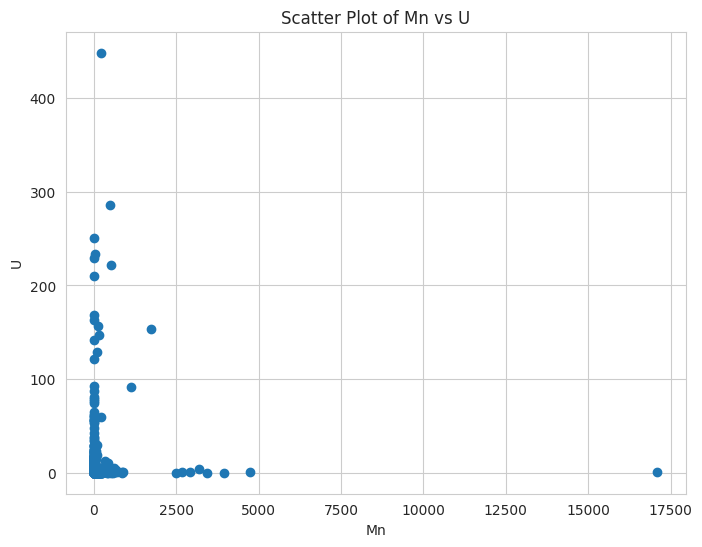

In [ ]:
# Scatter plot of Mn vs U
composition1 = data['Mn (ppb)']
composition2 = data['U (ppb)']
name1 = 'Mn'
name2 = 'U'
plt.figure(figsize=(8, 6))
plt.scatter(composition1, composition2)
plt.xlabel(name1)
plt.ylabel(name2)
plt.title(f'Scatter Plot of {name1} vs {name2}')
plt.show()



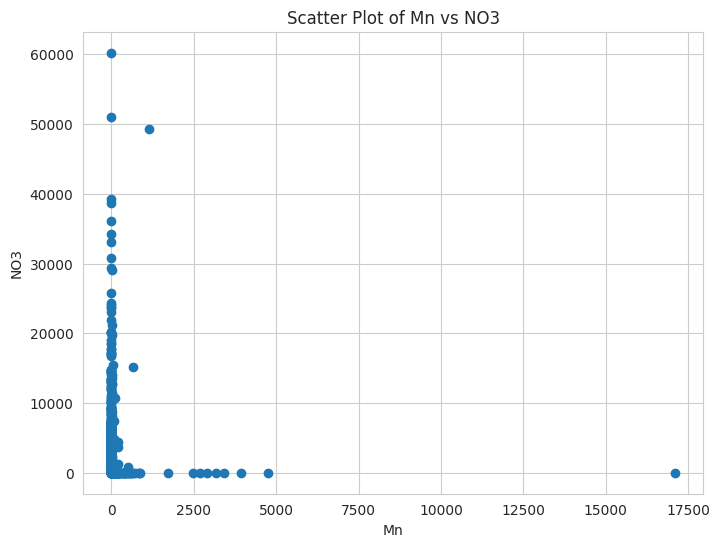

In [ ]:
# Scatter plot of Mn vs NO3
composition1 = data['Mn (ppb)']
composition2 = data['NO3 (ppb)']
name1 = 'Mn'
name2 = 'NO3'
plt.figure(figsize=(8, 6))
plt.scatter(composition1, composition2)
plt.xlabel(name1)
plt.ylabel(name2)
plt.title(f'Scatter Plot of {name1} vs {name2}')
plt.show()



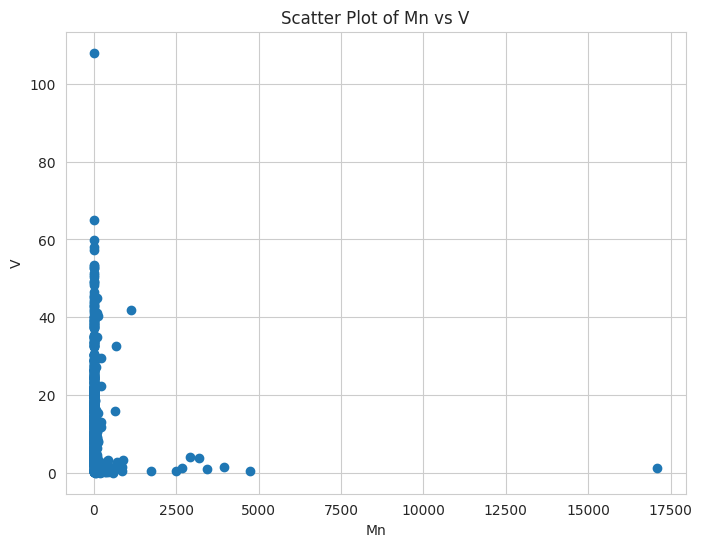

In [ ]:
# Scatter plot of Mn vs V
composition1 = data['Mn (ppb)']
composition2 = data['V (ppb)']
name1 = 'Mn'
name2 = 'V'
plt.figure(figsize=(8, 6))
plt.scatter(composition1, composition2)
plt.xlabel(name1)
plt.ylabel(name2)
plt.title(f'Scatter Plot of {name1} vs {name2}')
plt.show()



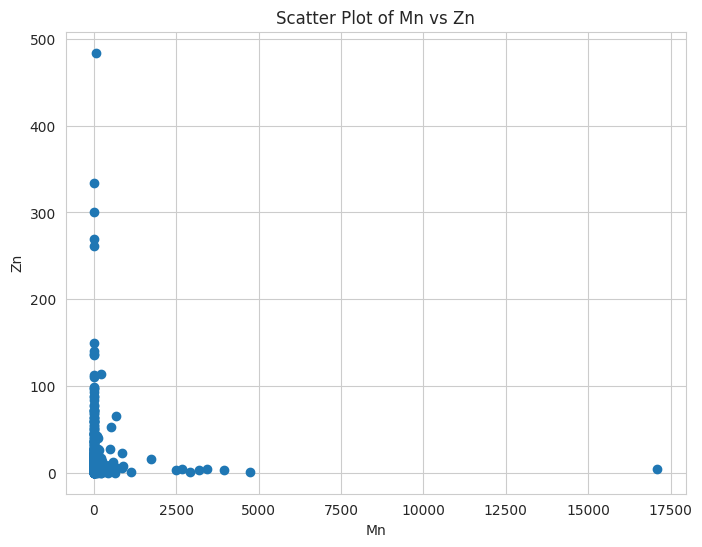

In [ ]:
# Scatter plot before log-ratio of Mn vs Zn
composition1 = data['Mn (ppb)']
composition2 = data['Zn (ppb)']
name1 = 'Mn'
name2 = 'Zn'
plt.figure(figsize=(8, 6))
plt.scatter(composition1, composition2)
plt.xlabel(name1)
plt.ylabel(name2)
plt.title(f'Scatter Plot of {name1} vs {name2}')
plt.show()



Using CoDaPack, I transformed the values into Additive Log Ratios (ALR) by selecting Manganese (Mn) as the reference element for division. I chose Mn because, in my initial variation array, it exhibited higher values (in red) when paired with other elements. After the transformation, I generated the following variation array based on these log-ratio values.

Next, I focused on key log-ratios involving Molybdenum (Mo), Uranium (U), Lead (Pb) and Arsenic (As), as these elements showed significant variation and are geochemically relevant.

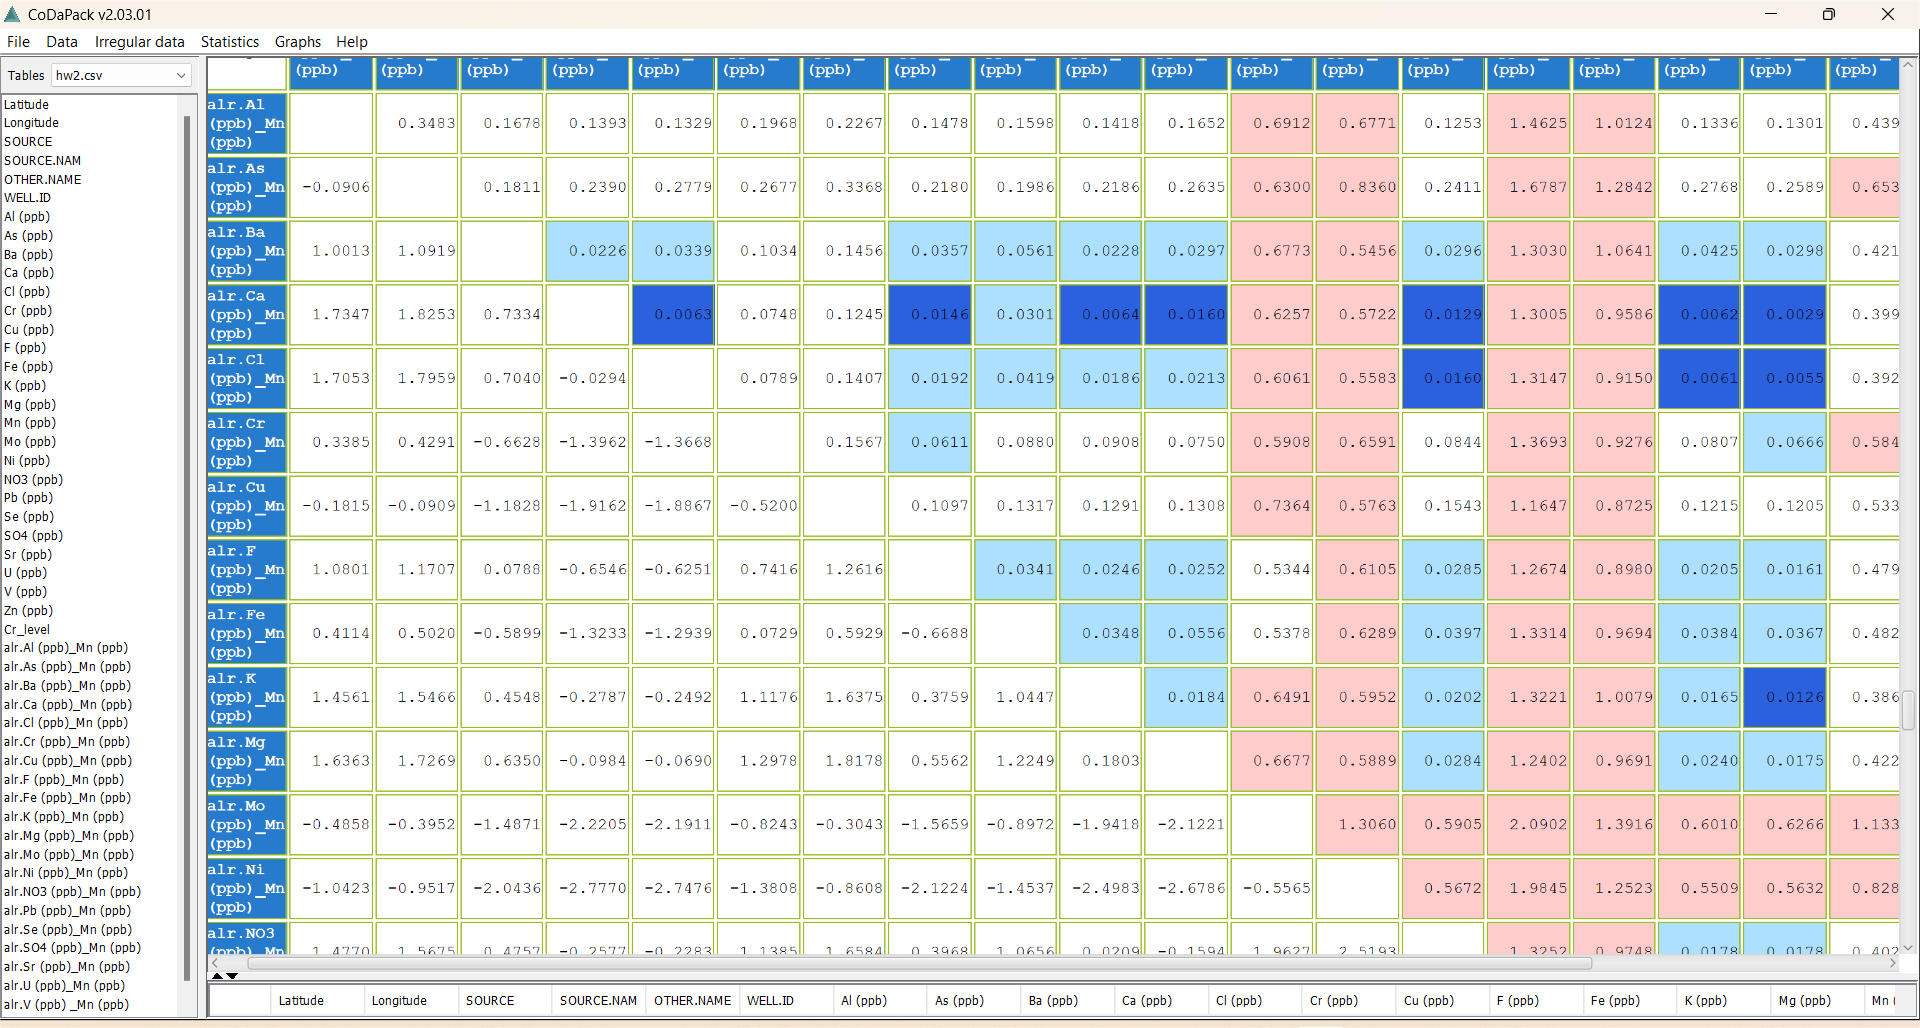

In [ ]:
# Display an image from Drive
from IPython.display import display, Image
image_path = "/content/drive/My Drive/Screenshot (55).png"
display(Image(filename=image_path))

To further explore relationships between these elements, we can created scatter plots of these log-ratios. These plots allow us to visualize patterns, correlations, and potential groupings in the data, which can provide insights into the underlying geochemical processes affecting groundwater quality.

Here we now plot Scatter Plots of Important Log-Ratios, below are some the important log ratios I considered from the varition array due to their high values.

- log_ratio1 = np.log(data['Pb (ppb)'] / data['Mn (ppb)']

name1 = 'log(Pb/Mn)'

- log_ratio2 = np.log(data['Mo (ppb)'] / data['Mn (ppb)']):

name2 = 'log(Mo/Mn)'

- log_ratio3 = np.log(data['As (ppb)'] / data['Mn (ppb)'])

name3 = 'log(As/Mn)'

- log_ratio4 = np.log(data['U (ppb)'] / data['Mn (ppb)'])

name4 = 'log(U/Mn)'




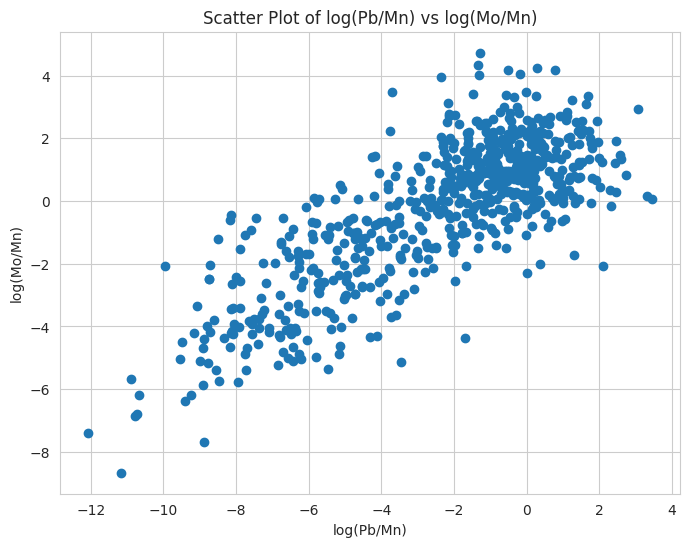

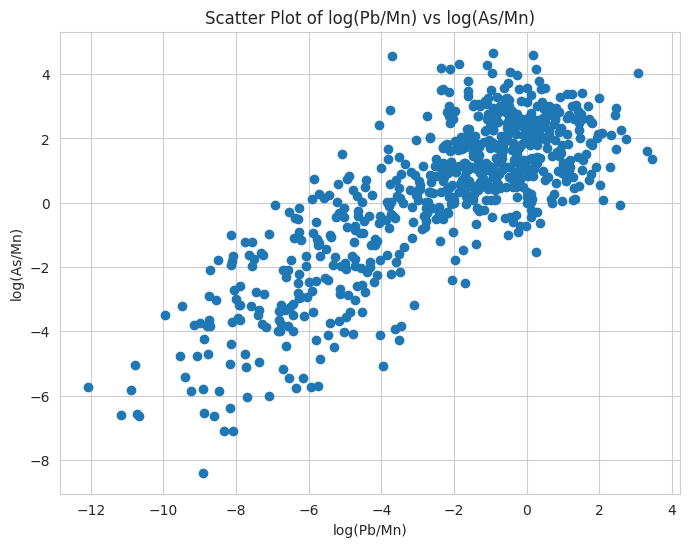

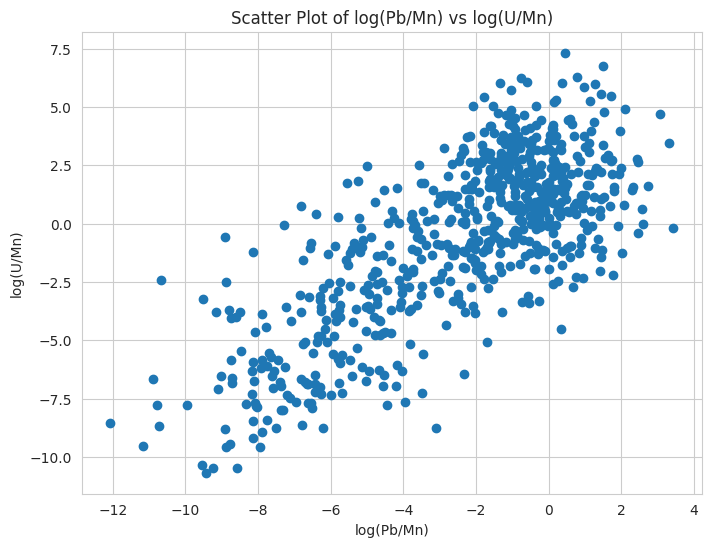

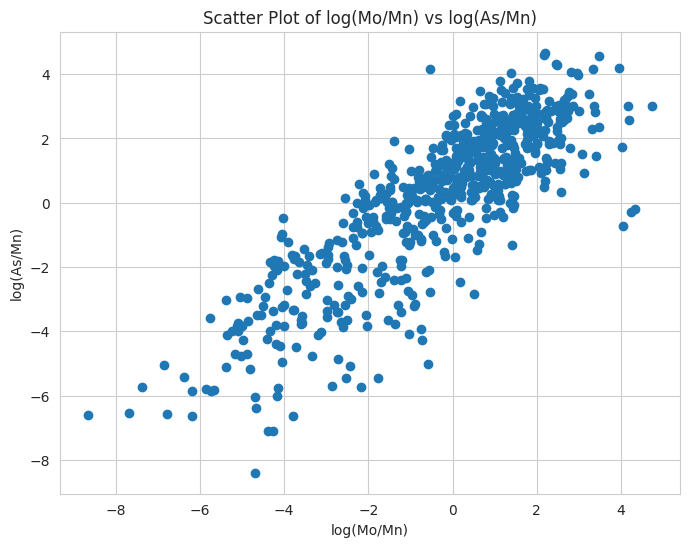

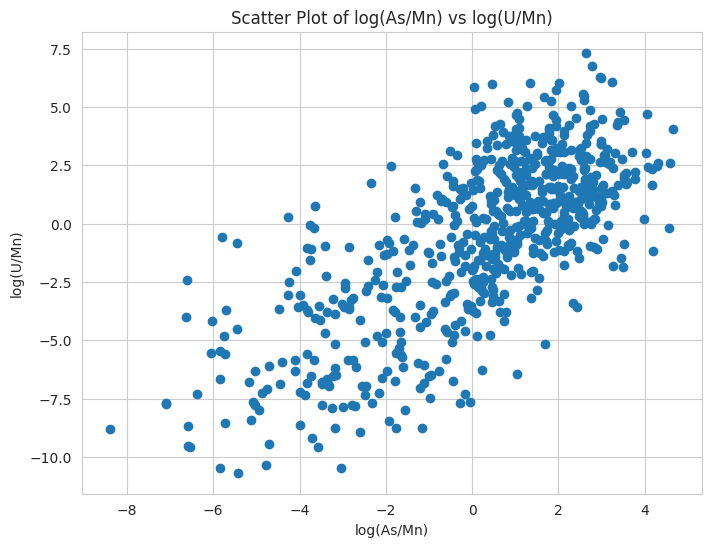

In [ ]:
# Here I Computed log-ratios as shown in the guide notebook
# Then made scatter plots for different combinations

log_ratio1 = np.log(data['Pb (ppb)'] / data['Mn (ppb)'])
name1 = 'log(Pb/Mn)'
log_ratio2 = np.log(data['Mo (ppb)'] / data['Mn (ppb)'])
name2 = 'log(Mo/Mn)'
log_ratio3 = np.log(data['As (ppb)'] / data['Mn (ppb)'])
name3 = 'log(As/Mn)'
log_ratio4 = np.log(data['U (ppb)'] / data['Mn (ppb)'])
name4 = 'log(U/Mn)'


# Scatter plot for 'log(Pn/Mn)' and 'log(Mo/Mn)'

plt.figure(figsize=(8, 6))
plt.scatter(log_ratio1, log_ratio2)
plt.xlabel(name1)
plt.ylabel(name2)
plt.title(f'Scatter Plot of {name1} vs {name2}')
plt.show()

# Scatter plot for 'log(Pn/Mn)' and 'log(As/Mn)'

plt.figure(figsize=(8, 6))
plt.scatter(log_ratio1, log_ratio3)
plt.xlabel(name1)
plt.ylabel(name3)
plt.title(f'Scatter Plot of {name1} vs {name3}')
plt.show()

 # Scatter plot for 'log(Pn/Mn)' and 'log(U/Mn)'

plt.figure(figsize=(8, 6))
plt.scatter(log_ratio1, log_ratio4)
plt.xlabel(name1)
plt.ylabel(name4)
plt.title(f'Scatter Plot of {name1} vs {name4}')
plt.show()

# Scatter plot for 'log(Mo/Mn)' and 'log(As/Mn)'

plt.figure(figsize=(8, 6))
plt.scatter(log_ratio2, log_ratio3)
plt.xlabel(name2)
plt.ylabel(name3)
plt.title(f'Scatter Plot of {name2} vs {name3}')
plt.show()

# Scatter plot for 'log(As/Mn)' and 'log(U/Mn)'

plt.figure(figsize=(8, 6))
plt.scatter(log_ratio3, log_ratio4)
plt.xlabel(name3)
plt.ylabel(name4)
plt.title(f'Scatter Plot of {name3} vs {name4}')
plt.show()


## This is Bukket Point Three: Ternary Diagrams

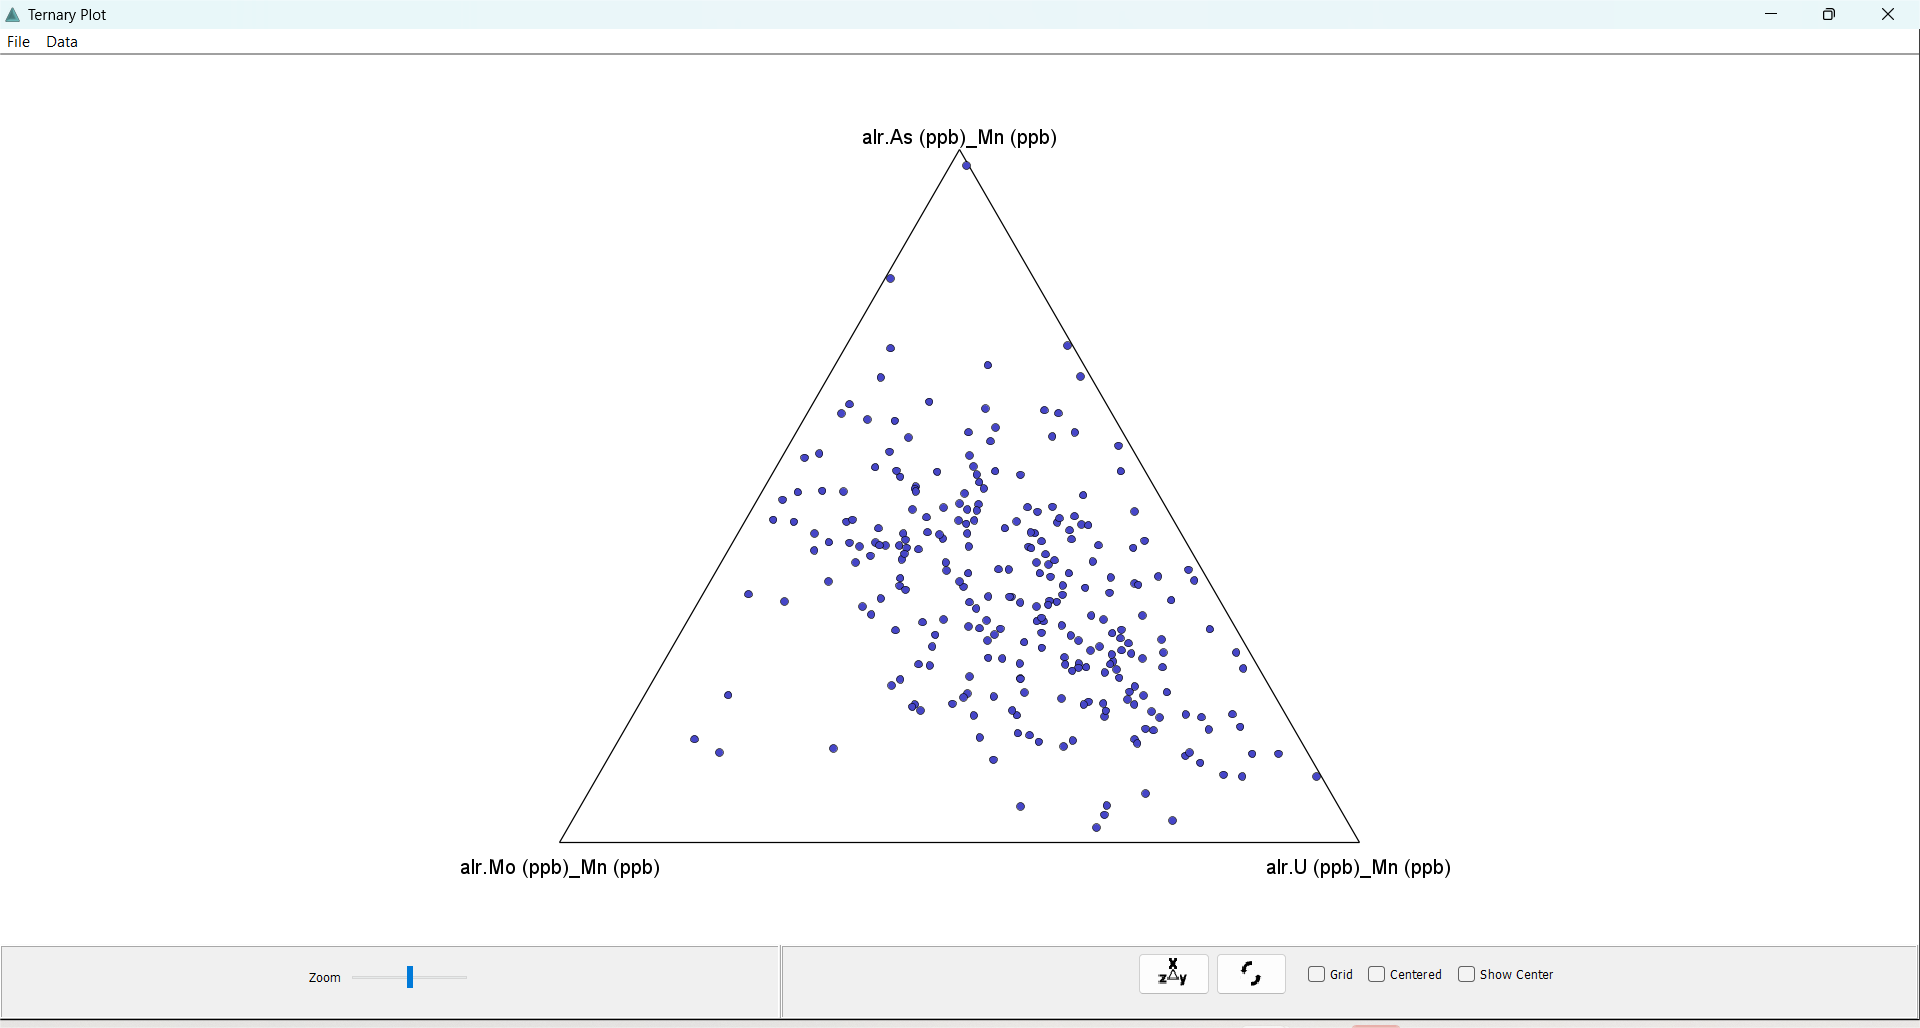

In [ ]:
# Display an image from Drive
from IPython.display import display, Image
image_path = "/content/drive/My Drive/Screenshot (56).png"
display(Image(filename=image_path))

No, ternary diagrams require centering however, CoDA Pack handles this automatically when generating ternary diagrams. All I had to do was select the three components of interest for the ternary plots.



## This is bullet point Four: Biplot

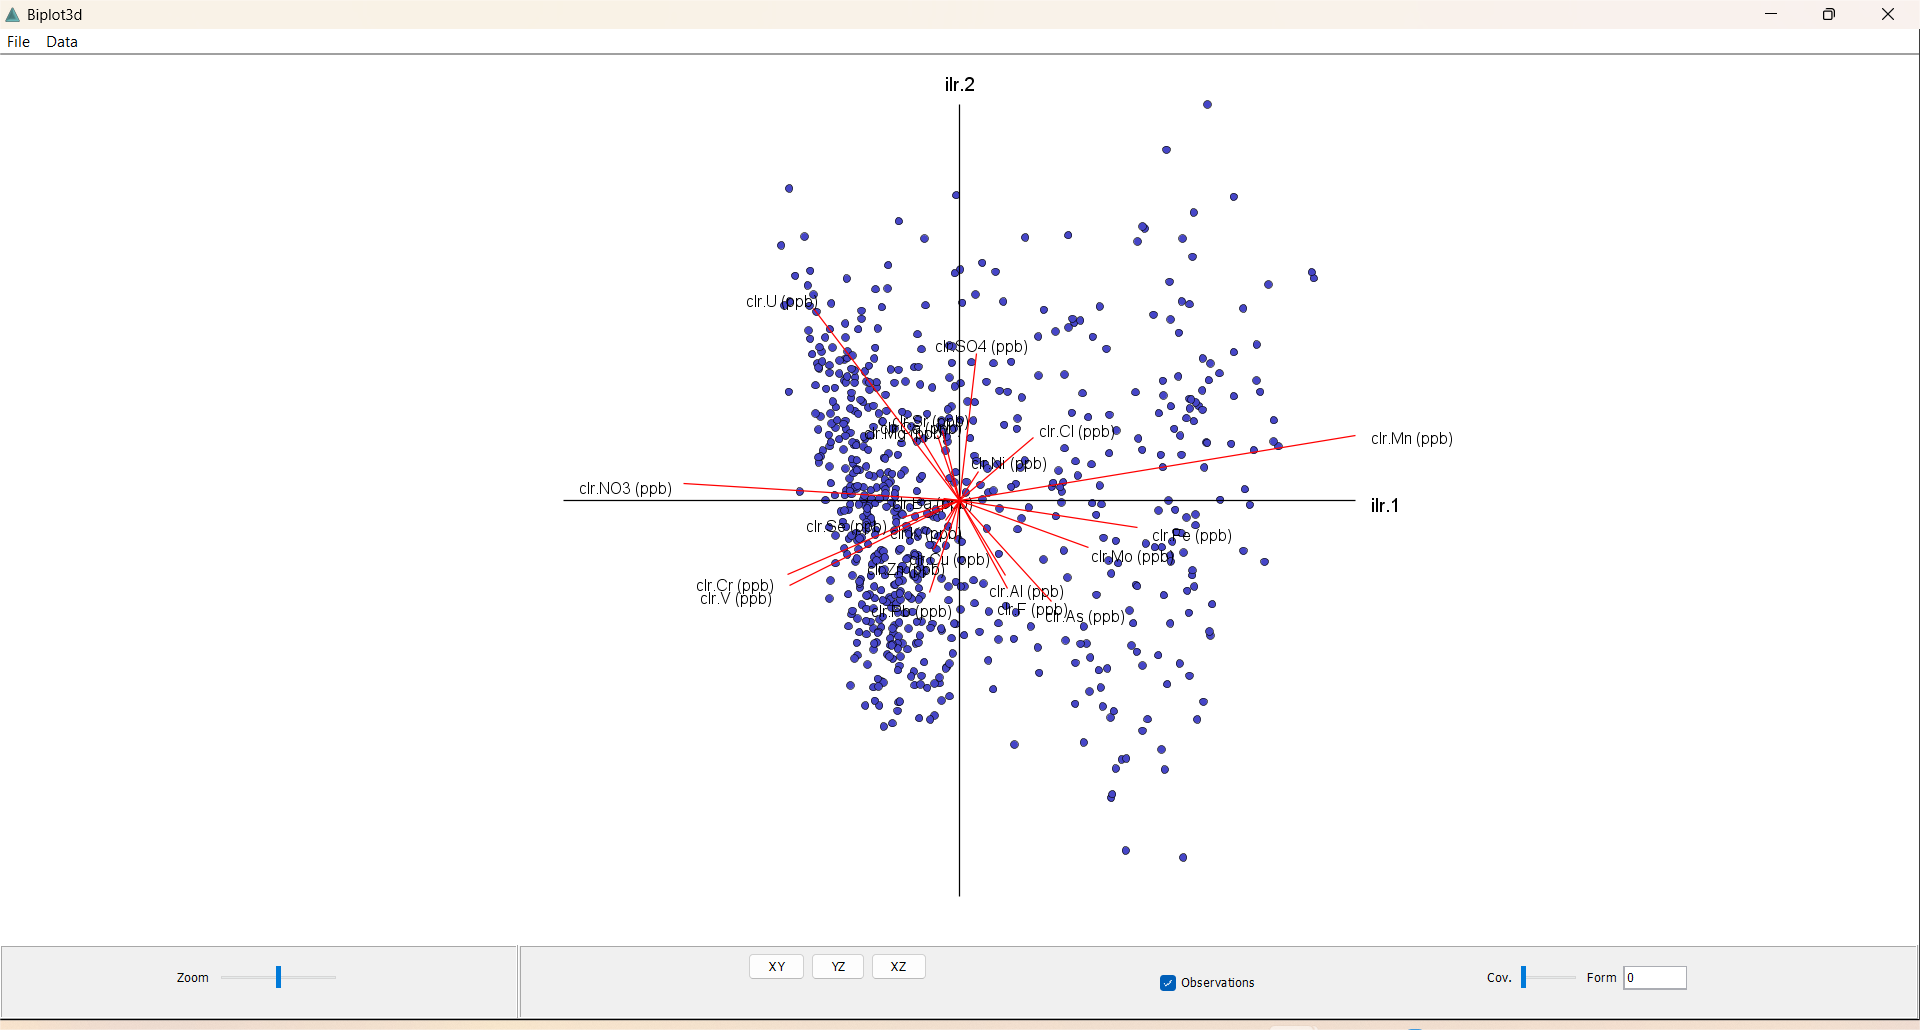

In [ ]:
# Display an image from Drive
from IPython.display import display, Image
image_path = "/content/drive/My Drive/Screenshot (53).png"
display(Image(filename=image_path))

Using Centered Log-Ratio (CLR) transformation, I created the biplot to analyze the relationships between different elements. The CLR transformation allows for a better visualization of the compositional structure, ensuring that all elements are expressed relative to the geometric mean.

## Observations are;

- Mn exhibits the longest red vector, indicating that it is the most varying component, followed by U (Uranium) and NO₃ (Nitrate).

- Elements such as Cr (Chromium), Zn (Zinc), Se (Selenium), and Pb (Lead) point in the same direction, suggesting a positive correlation among them.

- Mn and NO₃ point in opposite directions, indicating a negative correlation between these two elements.

-Clusters of positively correlated elements are visible, reinforcing the relationships observed in previous transformations.

## This is bollet Five: Map

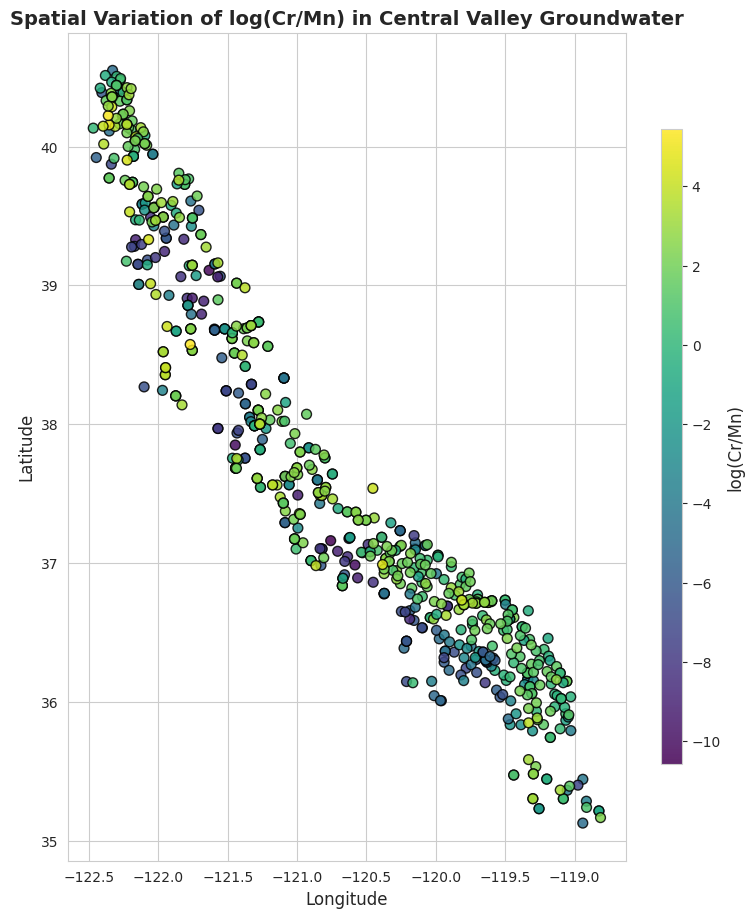

In [ ]:

data.columns = data.columns.str.strip()

# Here we handle zero values to avoid log(0) error
data.replace(0, np.nan, inplace=True)
data.dropna(subset=['Cr (ppb)', 'Mn (ppb)', 'Latitude', 'Longitude'], inplace=True)

# Then compute the log-ratio (Cr/Mn)
log_ratio = np.log(data['Cr (ppb)'] / data['Mn (ppb)'])
name = 'log(Cr/Mn)'

# Here we define figure and axis
fig, ax = plt.subplots(figsize=(9, 11))

# Scatter plot for and improved visualization
sc = ax.scatter(
    data['Longitude'], data['Latitude'],
    c=log_ratio, cmap='viridis', alpha=0.85, edgecolors='k', s=50
)

cbar = plt.colorbar(sc, ax=ax, label=name, shrink=0.75, aspect=30)
cbar.ax.set_ylabel(name, fontsize=12)

# Labels and title
ax.set_xlabel('Longitude', fontsize=12)
ax.set_ylabel('Latitude', fontsize=12)
ax.set_title(f"Spatial Variation of {name} in Central Valley Groundwater", fontsize=14, fontweight='bold')

# Maintain aspect ratio for geographic accuracy
ax.set_aspect('equal')

# Show the plot
plt.show()

We observe that the high values of log(Cr/Mn) are mostly clustered in specific regions, with some exceptions. Similarly, the low values tend to appear in distinct areas rather than being randomly scattered. This suggests that there is spatial correlation, possibly influenced by regional geology, groundwater flow patterns, or contamination sources.

## This is bullet point Six: Plots to be presented to the Geochemist

I will present a combination of the following plots to the geochemist:

### Biplots
- These help visualize correlations between different elements and identify key compositional relationships. The geochemist can use this to understand which elements vary together or independently.

### Ternary Diagrams
- These provide a way to analyze the relative proportions of three important components, which is useful for compositional data analysis in geochemistry.

### Maps
- Spatial variation maps (like the log-ratio map of Cr/Mn) help reveal spatial clustering or patterns in element concentrations, indicating potential geological or anthropogenic influences.

### Scatter Plots
- Pairwise scatter plots of important log-ratios help in assessing relationships between elements in a simpler and more direct way. These can highlight trends, clusters, or outliers that might not be evident in other plots.

This combination provides a comprehensive picture by incorporating spatial patterns, compositional relationships, and correlations, which are all essential for geological and environmental interpretations.

## This Is Problem 3: Clustering


I will use k-means clustering for this part of the problem. This algorithm divides the dataset into groups/clusters, before starting the clustering process, I will first load the dataset. I have named my dataset as hw2 for easy referencing.

In [ ]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from scipy.stats import gmean

# Here we load and preprocess the dataset.
file_path = "/content/drive/My Drive/hw2.csv"
try:
    data = pd.read_csv(file_path, encoding="utf-8")
except UnicodeDecodeError:
    data = pd.read_csv(file_path, encoding="ISO-8859-1")

data.dropna(inplace=True)

# For an easier analysis I defined element columns ensuring exact column names match the dataset
# And also defined the subset elements for the clustering process.
all_elements = [
    'Al (ppb)', 'As (ppb)', 'Ba (ppb)', 'Ca (ppb)', 'Cl (ppb)', 'Cr (ppb)',
    'Cu (ppb)', 'F (ppb)', 'Fe (ppb)', 'K (ppb)', 'Mg (ppb)', 'Mn (ppb)',
    'Mo (ppb)', 'Ni (ppb)', 'NO3 (ppb)', 'Pb (ppb)', 'Se (ppb)', 'SO4 (ppb)',
    'Sr (ppb)', 'U (ppb)', 'V (ppb)', 'Zn (ppb)'
]
subset_elements = ['Cr (ppb)', 'U (ppb)', 'SO4 (ppb)']

# Here we ensure only columns that exist in the dataset are selected

all_elements = [col for col in all_elements if col in data.columns]
subset_elements = [col for col in subset_elements if col in data.columns]

# Now we display the dataset info
print("Dataset loaded successfully!")
print(f"Columns in dataset: {list(data.columns)}")
print(f"Using element columns: {all_elements}")
print(f"Subset elements: {subset_elements}")



Dataset loaded successfully!
Columns in dataset: ['Latitude', 'Longitude', 'SOURCE', 'SOURCE.NAM', 'OTHER.NAME', 'WELL.ID', 'Al (ppb)', 'As (ppb)', 'Ba (ppb)', 'Ca (ppb)', 'Cl (ppb)', 'Cr (ppb)', 'Cu (ppb)', 'F (ppb)', 'Fe (ppb)', 'K (ppb)', 'Mg (ppb)', 'Mn (ppb)', 'Mo (ppb)', 'Ni (ppb)', 'NO3 (ppb)', 'Pb (ppb)', 'Se (ppb)', 'SO4 (ppb)', 'Sr (ppb)', 'U (ppb)', 'V (ppb) ', 'Zn (ppb)', 'Cr_level']
Using element columns: ['Al (ppb)', 'As (ppb)', 'Ba (ppb)', 'Ca (ppb)', 'Cl (ppb)', 'Cr (ppb)', 'Cu (ppb)', 'F (ppb)', 'Fe (ppb)', 'K (ppb)', 'Mg (ppb)', 'Mn (ppb)', 'Mo (ppb)', 'Ni (ppb)', 'NO3 (ppb)', 'Pb (ppb)', 'Se (ppb)', 'SO4 (ppb)', 'Sr (ppb)', 'U (ppb)', 'Zn (ppb)']
Subset elements: ['Cr (ppb)', 'U (ppb)', 'SO4 (ppb)']


K-means clustering is a method that partitions a dataset of
𝑛 observations into 𝑘 clusters, where each cluster is defined by its center the basically the mean of the points within that cluster. The fundamental principle of K-means is that each data point is assigned to the cluster whose center is closest to it, ensuring that every observation belongs to the most suitable group.

The algorithm begins with an initial set of 𝑘 cluster centers and iteratively refines them through two key steps which are;

### Assignment Step
- Each data point is assigned to the cluster whose center is nearest to it, minimizing the distance between the point and the cluster center.

### Update Step
- The cluster centers are recalculated by taking the mean of all points assigned to each cluster.

This iterative process continues until the cluster centers stabilize, meaning there are no significant changes in their positions. Before performing K-means clustering, it is essential to specify the number of clusters (𝑘), as it determines the number of groups the algorithm will form here (𝑘)=3.

## This is bullet point One: Cluster the samples as is (the raw input), that is, don’t use CODA, or remove any elements from the data.

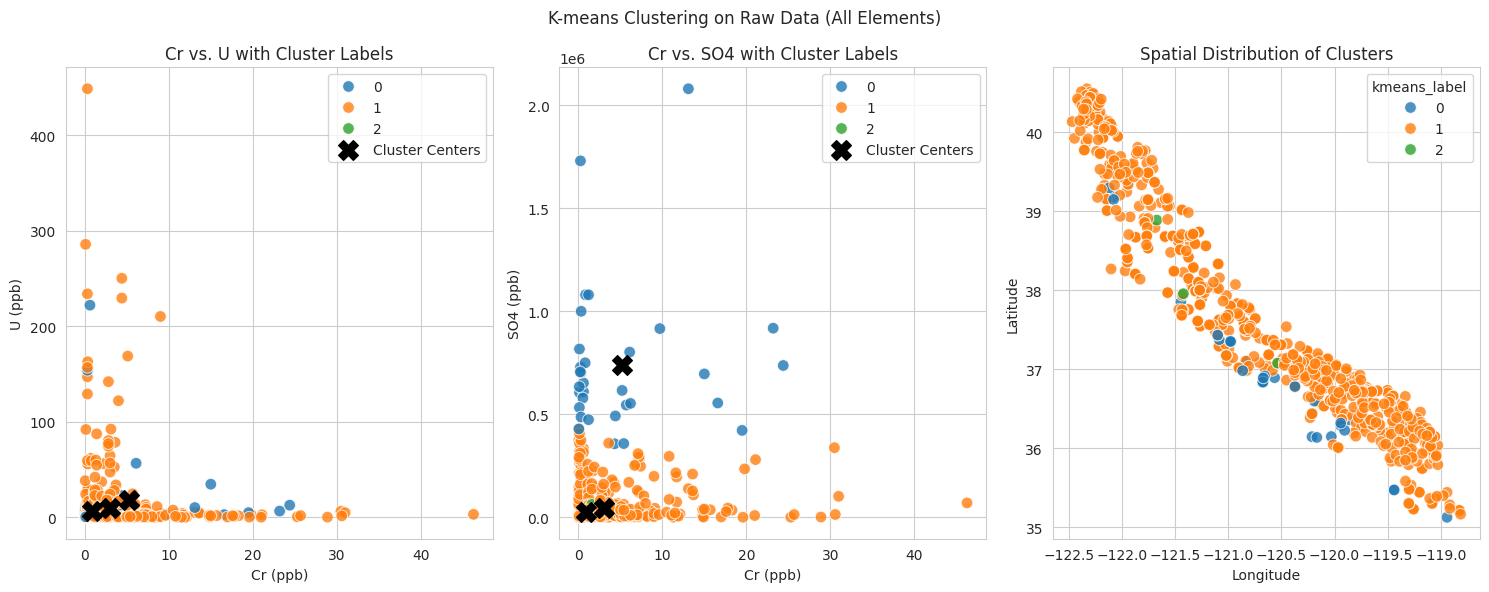

In [ ]:
kmeans_raw = KMeans(n_clusters=3, random_state=42)
data['kmeans_label'] = kmeans_raw.fit_predict(data[all_elements])

cluster_centers = kmeans_raw.cluster_centers_
cr_idx = all_elements.index('Cr (ppb)')
u_idx = all_elements.index('U (ppb)')
so4_idx = all_elements.index('SO4 (ppb)')

# After cluster centers we can visualize by creating plots
plt.figure(figsize=(15, 6))

# Since the problem state we have plots for Cr vs. U and Cr Vs SO4, we start with the plot of Cr Vs U
plt.subplot(131)
sns.scatterplot(
    data=data, x='Cr (ppb)', y='U (ppb)',
    hue='kmeans_label', palette='tab10', s=70, alpha=0.8
)
plt.scatter(
    cluster_centers[:, cr_idx],
    cluster_centers[:, u_idx],
    marker='X',
    s=200,
    c='black',
    label='Cluster Centers'
)
plt.xlabel('Cr (ppb)'); plt.ylabel('U (ppb)')
plt.title('Cr vs. U with Cluster Labels')
plt.legend()

# Then Cr vs. SO4 plot
plt.subplot(132)
sns.scatterplot(
    data=data, x='Cr (ppb)', y='SO4 (ppb)',
    hue='kmeans_label', palette='tab10', s=70, alpha=0.8
)
plt.scatter(
    cluster_centers[:, cr_idx],
    cluster_centers[:, so4_idx],
    marker='X',
    s=200,
    c='black',
    label='Cluster Centers'
)
plt.xlabel('Cr (ppb)'); plt.ylabel('SO4 (ppb)')
plt.title('Cr vs. SO4 with Cluster Labels')
plt.legend()

# Then lastly we visualize the Spatial distribution map
plt.subplot(133)
sns.scatterplot(
    data=data, x='Longitude', y='Latitude',
    hue='kmeans_label', palette='tab10', s=70, alpha=0.8
)
plt.xlabel('Longitude'); plt.ylabel('Latitude')
plt.title('Spatial Distribution of Clusters')

plt.suptitle('K-means Clustering on Raw Data (All Elements)')
plt.tight_layout()
plt.show()

## This is bullet point Two: Focus again on the raw data, but now use only on Cr, U and SO4

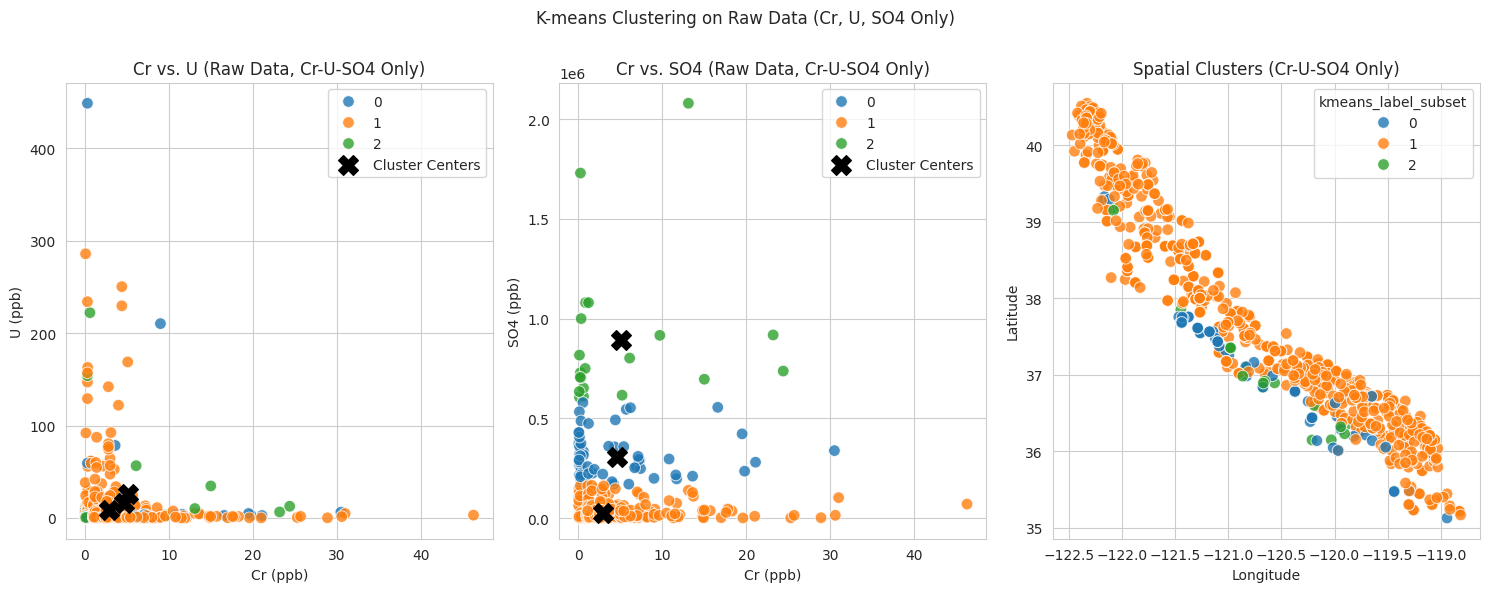

Cluster Centers (Cr-U-SO4 - Raw Data):
   Cr (ppb)    U (ppb)      SO4 (ppb)
0  4.622931  16.519793  307500.000000
1  2.899620   8.697557   27106.231405
2  5.120500  26.223336  893100.000000


In [ ]:
kmeans_subset_raw = KMeans(n_clusters=3, random_state=42)
data['kmeans_label_subset'] = kmeans_subset_raw.fit_predict(data[subset_elements])

cluster_centers_subset = kmeans_subset_raw.cluster_centers_
cr_idx_sub = subset_elements.index('Cr (ppb)')
u_idx_sub = subset_elements.index('U (ppb)')
so4_idx_sub = subset_elements.index('SO4 (ppb)')

# Now we can create plots
plt.figure(figsize=(15, 6))

# First for Cr vs. U
plt.subplot(131)
sns.scatterplot(
    data=data, x='Cr (ppb)', y='U (ppb)',
    hue='kmeans_label_subset', palette='tab10', s=70, alpha=0.8
)
plt.scatter(
    cluster_centers_subset[:, cr_idx_sub],
    cluster_centers_subset[:, u_idx_sub],
    marker='X',
    s=200,
    c='black',
    label='Cluster Centers'
)
plt.xlabel('Cr (ppb)'); plt.ylabel('U (ppb)')
plt.title('Cr vs. U (Raw Data, Cr-U-SO4 Only)')
plt.legend()

# And then for Cr vs. SO4
plt.subplot(132)
sns.scatterplot(
    data=data, x='Cr (ppb)', y='SO4 (ppb)',
    hue='kmeans_label_subset', palette='tab10', s=70, alpha=0.8
)
plt.scatter(
    cluster_centers_subset[:, cr_idx_sub],
    cluster_centers_subset[:, so4_idx_sub],
    marker='X',
    s=200,
    c='black',
    label='Cluster Centers'
)
plt.xlabel('Cr (ppb)'); plt.ylabel('SO4 (ppb)')
plt.title('Cr vs. SO4 (Raw Data, Cr-U-SO4 Only)')
plt.legend()

# Lastly we visualize the Spatial distribution plot
plt.subplot(133)
sns.scatterplot(
    data=data, x='Longitude', y='Latitude',
    hue='kmeans_label_subset', palette='tab10', s=70, alpha=0.8
)
plt.xlabel('Longitude'); plt.ylabel('Latitude')
plt.title('Spatial Clusters (Cr-U-SO4 Only)')

plt.suptitle('K-means Clustering on Raw Data (Cr, U, SO4 Only)')
plt.tight_layout()
plt.show()

# Additionally, for a greater insight we can print cluster centers
print("Cluster Centers (Cr-U-SO4 - Raw Data):")
print(pd.DataFrame(cluster_centers_subset, columns=subset_elements))

## This is bullet point Three: Cluster the samples after using the 𝑐𝑙𝑟 transformations, but still keeping all elements.

In [ ]:
def clr_transform(df, cols):
    """Apply Centered Log-Ratio (CLR) transformation to compositional data."""
    df_transformed = df[cols] + 1e-9
    gm = gmean(df_transformed, axis=1)
    clr_data = np.log(df_transformed.div(gm, axis=0))
    return clr_data

data_clr_all = clr_transform(data, all_elements)
data_clr_subset = clr_transform(data, subset_elements)


In [ ]:
def perform_kmeans(data, n_clusters=3):
    """Perform K-means clustering on standardized data."""
    scaler = StandardScaler()
    scaled_data = scaler.fit_transform(data)
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    return kmeans.fit_predict(scaled_data)

# Here cluster labels for all scenarios
labels_raw_all = perform_kmeans(data[all_elements])
labels_raw_subset = perform_kmeans(data[subset_elements])
labels_clr_all = perform_kmeans(data_clr_all)
labels_clr_subset = perform_kmeans(data_clr_subset)

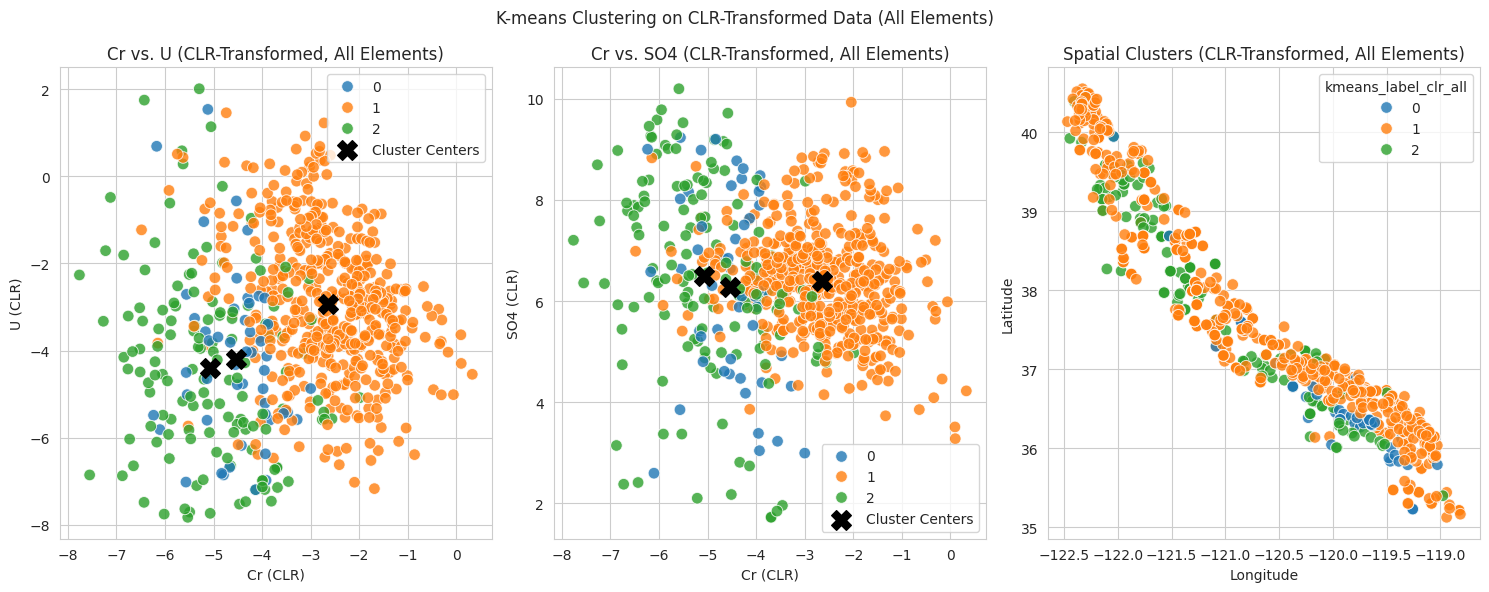

In [ ]:
kmeans_clr_all = KMeans(n_clusters=3, random_state=42)
data['kmeans_label_clr_all'] = kmeans_clr_all.fit_predict(data_clr_all) # This is where you create and save the cluster labels for the clr transformed data
cluster_centers_clr_all = kmeans_clr_all.cluster_centers_

cr_idx = all_elements.index('Cr (ppb)')
u_idx = all_elements.index('U (ppb)')
so4_idx = all_elements.index('SO4 (ppb)')

plt.figure(figsize=(15, 6))

# Cr vs. U plot (CLR-transformed data)
plt.subplot(131)
sns.scatterplot(
    data=data_clr_all,
    x='Cr (ppb)', y='U (ppb)',
    hue=data['kmeans_label_clr_all'],  # Use labels from full data
    palette='tab10', s=70, alpha=0.8
)

plt.scatter(
    cluster_centers_clr_all[:, cr_idx],  # Correct indices
    cluster_centers_clr_all[:, u_idx],
    marker='X', s=200, c='black', label='Cluster Centers'
)
plt.xlabel('Cr (CLR)'); plt.ylabel('U (CLR)')
plt.title('Cr vs. U (CLR-Transformed, All Elements)')
plt.legend()

# Cr vs. SO4 plot (CLR-transformed)
plt.subplot(132)
sns.scatterplot(
    data=data_clr_all,
    x='Cr (ppb)', y='SO4 (ppb)',
    hue=data['kmeans_label_clr_all'], palette='tab10', s=70, alpha=0.8
)

plt.scatter(
    cluster_centers_clr_all[:, cr_idx],
    cluster_centers_clr_all[:, so4_idx],
    marker='X', s=200, c='black', label='Cluster Centers'
)
plt.xlabel('Cr (CLR)'); plt.ylabel('SO4 (CLR)')
plt.title('Cr vs. SO4 (CLR-Transformed, All Elements)')
plt.legend()

# Spatial distribution plot Longitude vs. Latitude
plt.subplot(133)
sns.scatterplot(
    data=data, x='Longitude', y='Latitude',
    hue='kmeans_label_clr_all', palette='tab10', s=70, alpha=0.8
)
plt.xlabel('Longitude'); plt.ylabel('Latitude')
plt.title('Spatial Clusters (CLR-Transformed, All Elements)')

plt.suptitle('K-means Clustering on CLR-Transformed Data (All Elements)')
plt.tight_layout()
plt.show()

## This is bullet point Four: Cluster the samples after using the 𝑐𝑙𝑟 transformations, but only keeping Cr, U and SO4.

In [ ]:
def perform_kmeans(data, n_clusters=3):
    """Perform K-means clustering on standardized data and return labels, centers, and scaler."""
    scaler = StandardScaler()
    scaled_data = scaler.fit_transform(data)
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    kmeans.fit(scaled_data)
    labels = kmeans.labels_
    return labels, kmeans.cluster_centers_, scaler

In [ ]:
labels_clr_subset, cluster_centers, scaler = perform_kmeans(data_clr_subset)

if len(labels_clr_subset) == len(data):
    data['kmeans_label_clr_subset'] = labels_clr_subset
else:
    raise ValueError("Mismatch in data length and cluster labels!")

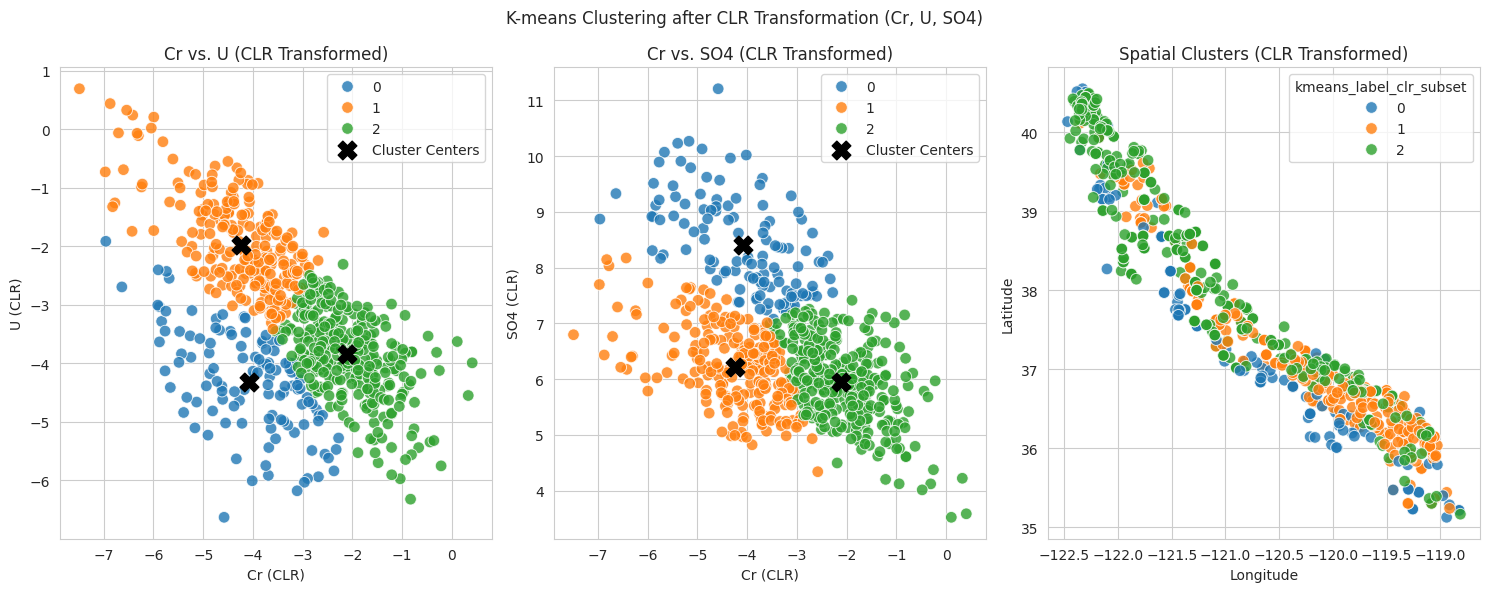

In [ ]:
centers_clr = scaler.inverse_transform(cluster_centers)

plt.figure(figsize=(15, 6))

# Cr vs. U plot (CLR transformed subset data)
plt.subplot(131)
sns.scatterplot(
    data=data_clr_subset,
    x='Cr (ppb)', y='U (ppb)',
    hue=data['kmeans_label_clr_subset'], palette='tab10', s=70, alpha=0.8
)

plt.scatter(centers_clr[:,0], centers_clr[:,1],
            marker='X', s=180, c='k', label='Cluster Centers')
plt.xlabel('Cr (CLR)'); plt.ylabel('U (CLR)')
plt.title('Cr vs. U (CLR Transformed)')
plt.legend()

# Cr vs. SO4 plot (CLR transformed subset data)
plt.subplot(132)
sns.scatterplot(
    data=data_clr_subset,
    x='Cr (ppb)', y='SO4 (ppb)',
    hue=data['kmeans_label_clr_subset'], palette='tab10', s=70, alpha=0.8
)

plt.scatter(centers_clr[:,0], centers_clr[:,2],
            marker='X', s=180, c='k', label='Cluster Centers')
plt.xlabel('Cr (CLR)'); plt.ylabel('SO4 (CLR)')
plt.title('Cr vs. SO4 (CLR Transformed)')
plt.legend()

# Now the Spatial distribution plot (Longitude vs. Latitude)
plt.subplot(133)
sns.scatterplot(
    data=data, x='Longitude', y='Latitude',
    hue='kmeans_label_clr_subset', palette='tab10', s=70, alpha=0.8
)
plt.xlabel('Longitude'); plt.ylabel('Latitude')
plt.title('Spatial Clusters (CLR Transformed)')

plt.suptitle('K-means Clustering after CLR Transformation (Cr, U, SO4)')
plt.tight_layout()
plt.show()

## This is the last part of problem 3: Do you observe a noticeable difference in using CODA vs not using CODA?
## Do you observe a noticeable difference between the cluster labels based on all elements vs based only
on Cr, U and SO4?

## CODA vs No CODA
Using CODA for compositional data analysis provided significant advantages, particularly in visualizing data structures such as tables, variance arrays, and log-ratio transformations. The ability to generate biplots and ternary diagrams made it much easier to interpret the relationships between different elements. One of the most remarkable features of CODA is its interactive graphing capabilities, allowing for dynamic manipulation of ternary diagrams and biplots. This interactivity makes it effortless to identify uncorrelated elements by examining perpendicular relationships in biplots, providing deep insights into the dataset.

On the other hand, without CODA, Python offers various libraries that can still generate these visualizations and compute log ratios. However, the visualization experience is somewhat limited due to the lack of interactive features, which is understandable given the nature of standard plotting libraries. Without CODA’s intuitive graphical tools, analyzing compositional data often requires clustering techniques and additional inferential approaches. Despite this limitation, mapping scatter plots proved to be highly useful for understanding spatial distributions. Based on this experience, I would prefer to use CODA initially for compositional data analysis to gain a strong understanding of correlations through biplots and ternary diagrams before shifting to Python for more detailed spatial distribution analysis.

## All Elements vs. Cr, SO4, and U
When comparing the clustering behavior using all elements versus a subset focused on Cr, SO4, and U, there were notable differences in how the clusters formed. When considering the entire dataset, Cluster 3 exhibited more randomness, while Clusters 1 and 2 were less compact, making it harder to draw clear distinctions between them. However, when the analysis was restricted to just Cr, SO4, and U, Clusters 1 and 2 became more well-defined and compact, while Cluster 3 showed a slight reduction in its randomness. This suggests that narrowing the focus to specific elements can enhance the clarity of the clustering structure, making it easier to interpret relationships within the data.